## 1. Network Structure

## AHUA 1.

In [63]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  5 22:38:51 2019

@author: Jones
"""

"""
Consider complex input
"""
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Flatten, ZeroPadding2D, ZeroPadding1D
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
import os
import matplotlib.pyplot as plt
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import tensorflow as tf
import math
%matplotlib inline

working_dir = os.getcwd()
#gen_folder_path = os.path.join(working_dir, 'gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_gen_folder')
gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_lesssnr_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'gamma_gen_folder')

#del model
keras.backend.clear_session()

from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

model = Sequential()

input_shape_num = 774#for LCM basis
#input_shape_num = 467#for gamma basis

k = 1000#total lines
#height x width x channel x array = input_shape_num, 1,1,k

block_1_filter_num = 32
conv_filter_size = 15

############block 1###############
#要怎麼padding 應該是要CONV前先PADDING 但是一開始不能餵給他 input shape 到底??

#model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1, input_shape=(input_shape_num,1)))
model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1, input_shape=(input_shape_num,1),dtype='float32'))
#model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1, input_shape=(input_shape_num,1,2)))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

#model.add(ZeroPadding2D(padding = (7,0)))
model.add(ZeroPadding1D(padding = (7)))
#model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

#model.add(ZeroPadding2D(padding = (7,0)))
model.add(ZeroPadding1D(padding = (7)))
#model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))

#model.add(ZeroPadding2D(padding = (7,0)))
model.add(ZeroPadding1D(padding = (7)))
#model.add(Conv2D(filters=block_1_filter_num, kernel_size=(15,1), strides=1))
model.add(Conv1D(filters=block_1_filter_num, kernel_size=(15), strides=1))
model.add(BatchNormalization(scale=False, center=False))#?????
model.add(Activation('relu'))
#model.add(MaxPooling2D((2,1)))#Why not 1D?
model.add(MaxPooling1D((2)))#Why not 1D?

############block 2###############
block_2_filter_num = 64
for nrep in range(4):
    #model.add(ZeroPadding2D(padding = (7,0)))
    #model.add(Conv2D(filters=block_2_filter_num, kernel_size=(15,1), strides=1))
    model.add(ZeroPadding1D(padding = (7)))
    model.add(Conv1D(filters=block_2_filter_num, kernel_size=(15), strides=1))    
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))
model.add(MaxPooling1D((2)))#Why not 1D?
############block 3###############
block_3_filter_num = 128
for nrep in range(4):
    model.add(ZeroPadding1D(padding = (7)))
    model.add(Conv1D(filters=block_2_filter_num, kernel_size=(15), strides=1))
    model.add(BatchNormalization(scale=False, center=False))#?????
    model.add(Activation('relu'))

###########FC, Regression##############
'''
model.add(Flatten())
model.add(Dense(input_shape_num, activation = "linear"))
#model.add(Dense(input_shape_num, kernel_regularizer=l2(0.0001), activation = "linear"))
model.summary()
#sgdm = SGD(lr=1e-1, momentum= 0.8, decay=1.0291e-4)
#sgdm = SGD(lr=3e-8, momentum= 0.8)

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 1e-4
    drop = 0.1
    epochs_drop = 90.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
#sgdm = SGD(lr=0.0, momentum=0.8)
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
#callbacks_list = [lrate]
#model.compile(loss = 'mse', optimizer=sgdm,  metrics=['mape'])
model.compile(loss = 'mse', optimizer='adam',  metrics=['mape'])

##########More FC####################
'''
model.add(Flatten())
model.add(Dense(input_shape_num*5, kernel_regularizer=l2(0.0001)))
#model.add(Dense(input_shape_num, activation = "linear"))
model.add(Dense(input_shape_num, kernel_regularizer=l2(0.0001), activation = "linear"))
model.summary()
#sgdm = SGD(lr=1e-2, momentum= 0.8, decay=1.0291e-4)
#sgdm = SGD(lr=1e-1, momentum= 0.8, decay=1.0291e-4)

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 1e-4
    drop = 0.1
    epochs_drop = 90.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
#sgdm = SGD(lr=0.0, momentum=0.8)
# learning schedule callback
lrate = LearningRateScheduler(step_decay)

#加一層loss nan, why?
#model.compile(loss = 'mse', optimizer=sgdm,  metrics=['mape'])
model.compile(loss = 'mse', optimizer='adam',  metrics=['mape'])
#model.compile(loss = 'mse', optimizer='Nadam',  metrics=['mape'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 760, 32)           512       
_________________________________________________________________
batch_normalization_1 (Batch (None, 760, 32)           64        
_________________________________________________________________
activation_1 (Activation)    (None, 760, 32)           0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 774, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 760, 32)           15392     
_________________________________________________________________
batch_normalization_2 (Batch (None, 760, 32)           64        
_________________________________________________________________
activation_2 (Activation)    (None, 760, 32)           0         
__________

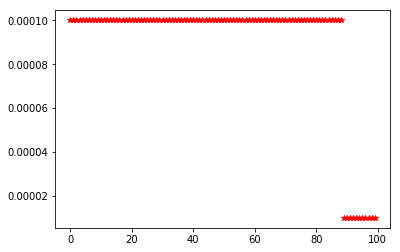

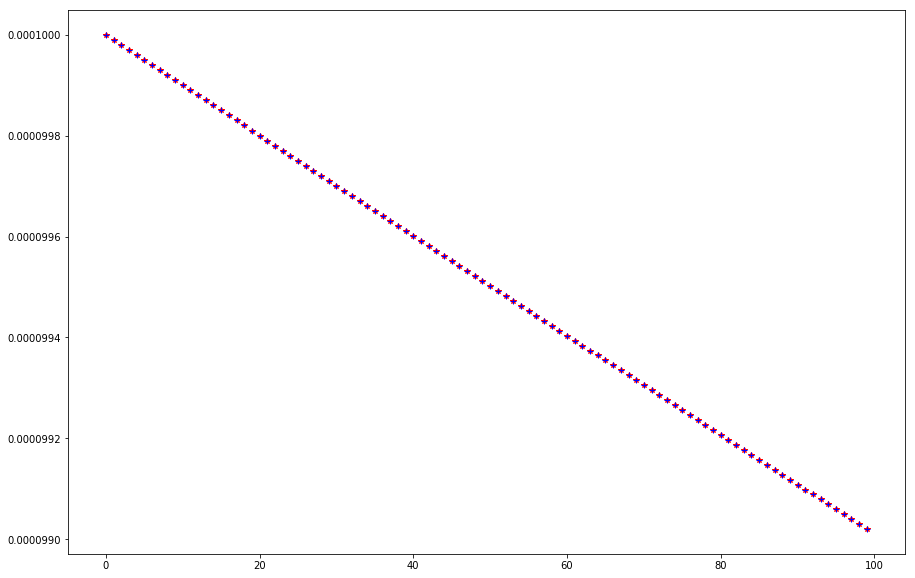

In [109]:
plt.figure(figsize=(6,4))
for i in range(100):
    #print(step_decay(i))
    plt.plot(i, step_decay(i),'*r')
    #plt.ylim(0.,0.0001)

#time decay
def time_decay1(LearningRate, epoch):
    #decay_rate = LearningRate / epochs
    LearningRate = 1e-4
    decay_rate = 1e-4
    LearningRate = LearningRate * 1/(1 + decay_rate * epoch)
    return LearningRate

LearningRate = 1e-4
epochs = 100
plt.figure(figsize=(15,10))

for i in range(epochs):
    #print(step_decay(i))
    plt.plot(i, time_decay1(LearningRate,i),'*r')

LearningRate = 1e-4
def time_decay2(LearningRate, epoch):
    #LearningRate = 1e-4
    decay_rate = 1e-4
    LearningRate = LearningRate * 1/(1 + decay_rate * epoch)
    return LearningRate

for i in range(epochs):
    #print(step_decay(i))
    plt.plot(i, time_decay2(LearningRate,i),'+b')


In [2]:
#for more fc layer
from keras.models import Model

layer1_name = 'flatten_1'
layer_dense_name = 'dense_1'
intermediate_layer_flatten_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer1_name).output)

intermediate_layer_1stdense_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_dense_name).output)




## Read spectrum data and metabolite concectration table
Read and concatenate read data and conc. table for splitting

## AHUA 2.

In [28]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

stime = time.time()

#tmp_X = np.zeros((50000,837,),dtype=np.csingle)
#tmp_Y = np.zeros((50000,837,),dtype=np.csingle)
tmp_X = np.zeros((50000,774,),dtype=np.csingle)
tmp_Y = np.zeros((50000,774,),dtype=np.csingle)
#tmp_X = np.zeros((50000,467,),dtype=np.cdouble)
#tmp_Y = np.zeros((50000,467,),dtype=np.cdouble)


files = [ f for f in os.listdir(gen_folder_path) if os.path.isfile(os.path.join(gen_folder_path,f)) ]

count = 0
for idx, cont in enumerate(tqdm_notebook(files)):
    read_data= np.load(os.path.join(gen_folder_path, cont))
    #print('read_data[X]',read_data['X'])
    tmp_X[idx,:] = read_data['X']
    tmp_Y[idx,:] = read_data['Y']
    #tmp_X[idx] = np.expand_dims(read_data['X'],axis = 1)
    #tmp_Y[idx] =np.expand_dims(read_data['Y'],axis = 1)
read_X = np.expand_dims(tmp_X,axis = 2)
read_Y = tmp_Y
etime = time.time()
print('Loading time:', etime-stime)

######################################
# Load conc. table
######################################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

brain_betabo_conc_table_path = os.path.join(gen_folder_path, 'brain_betabo_conc_table_df')
brain_betabo_conc_table_files = [ f for f in os.listdir(brain_betabo_conc_table_path) if os.path.isfile(os.path.join(brain_betabo_conc_table_path,f)) ]

brain_conc_set = []

for idx in tqdm_notebook(brain_betabo_conc_table_files):
    read_data= pd.read_pickle(os.path.join(brain_betabo_conc_table_path, idx))
    read_data.set_index("names" , inplace=True)
    brain_conc_set.append(read_data['conc'])
print('brain_conc_set',(brain_conc_set[0]))

np_brain_conc_set = np.array(brain_conc_set)
#print('np_brain_conc_set',np_brain_conc_set.shape)
#print('read_Y',read_Y.shape)
#Concatenate read data and conc. table for splitting
read_Y_conc_set = np.concatenate((read_Y, np_brain_conc_set), axis = 1)
print('read_Y_conc_set',read_Y_conc_set.shape)

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))


Loading time: 625.9751365184784


HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))


brain_conc_set names
Ala       0.440837
Asp       1.847635
Cr        7.211386
GABA      1.459272
Glc       1.119907
Gln       4.718595
Glu       7.580750
GPC       0.853352
PCh       0.597673
Lac       0.830290
mI        7.805928
NAA       7.715921
NAAG      2.017281
Scyllo    0.000000
Tau       5.134635
Name: conc, dtype: float64
read_Y_conc_set (50000, 789)


## (Optional) If you just want load the "brain_conc_set" file imdex, just load this one

In [2]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
######################################
# Load conc. table
######################################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

brain_betabo_conc_table_path = os.path.join(gen_folder_path, 'brain_betabo_conc_table_df')
brain_betabo_conc_table_files = [ f for f in os.listdir(brain_betabo_conc_table_path) if os.path.isfile(os.path.join(brain_betabo_conc_table_path,f)) ]

brain_conc_set = []

for idx in tqdm_notebook(brain_betabo_conc_table_files[:2]):
    read_data= pd.read_pickle(os.path.join(brain_betabo_conc_table_path, idx))
    read_data.set_index("names" , inplace=True)
    brain_conc_set.append(read_data['conc'])
print('brain_conc_set',(brain_conc_set[0]))

np_brain_conc_set = np.array(brain_conc_set)


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


brain_conc_set names
Ala       0.440837
Asp       1.847635
Cr        7.211386
GABA      1.459272
Glc       1.119907
Gln       4.718595
Glu       7.580750
GPC       0.853352
PCh       0.597673
Lac       0.830290
mI        7.805928
NAA       7.715921
NAAG      2.017281
Scyllo    0.000000
Tau       5.134635
Name: conc, dtype: float64


## Model training config: Early stopping...、Tensor borad

## AHUA 3.

In [69]:
from keras.callbacks import TensorBoard
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#tensorboard --logdir ./logs 

cb_path = './fc5_adam_100epoch_cblr_logs'

tbCallBack = TensorBoard(log_dir=cb_path,# log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
earlystopper = EarlyStopping(patience=8,monitor='val_loss', mode='min', verbose=1)
checkpointer = ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min')
reducelronplateau = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=3, min_lr=1e-6, verbose=1)
def on_epoch_end(self, epoch, logs=None):
    print(K.eval(self.model.optimizer.lr))
print(cb_path + '/TP1.h5')

'''
Checkpoints =[EarlyStopping(patience=8,monitor='val_loss', mode='min', verbose=1),
              ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min'),
              ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)]
#EarlyStopping: 当被监测的数量沒有變得更好，则停止训练。 In min mode, training will stop when the quantity monitored has stopped decreasing
#ModelCheckpoint(filepath = './TP1.h5',monitor='val_loss',mode='min'),
#os.path.join(cb_path,weights.{epoch:02d}-{val_loss:.2f}.h5)
class SGDLearningRateTracker(Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr * (1. / (1. + optimizer.decay * optimizer.iterations)))
        print('\nLR: {:.6f}\n'.format(lr))
# define your model

#model.fit(x, y, callbacks=[SGDLearningRateTracker()])
'''


./fc5_adam_100epoch_cblr_logs/TP1.h5


"\nCheckpoints =[EarlyStopping(patience=8,monitor='val_loss', mode='min', verbose=1),\n              ModelCheckpoint(filepath = cb_path+'/TP1.h5',monitor='val_loss',mode='min'),\n              ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5, verbose=1)]\n#EarlyStopping: 当被监测的数量沒有變得更好，则停止训练。 In min mode, training will stop when the quantity monitored has stopped decreasing\n#ModelCheckpoint(filepath = './TP1.h5',monitor='val_loss',mode='min'),\n#os.path.join(cb_path,weights.{epoch:02d}-{val_loss:.2f}.h5)\nclass SGDLearningRateTracker(Callback):\n    def on_epoch_end(self, epoch, logs={}):\n        optimizer = self.model.optimizer\n        lr = K.eval(optimizer.lr * (1. / (1. + optimizer.decay * optimizer.iterations)))\n        print('\nLR: {:.6f}\n'.format(lr))\n# define your model\n\n#model.fit(x, y, callbacks=[SGDLearningRateTracker()])\n"

In [38]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Flatten, ZeroPadding2D, ZeroPadding1D
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
import os
import matplotlib.pyplot as plt
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd
import tensorflow as tf
import math
%matplotlib inline

working_dir = os.getcwd()
#gen_folder_path = os.path.join(working_dir, 'gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_gen_folder')
gen_folder_path = os.path.join(working_dir, 'NONORM_42ppm_lesssnr_gen_folder')
#gen_folder_path = os.path.join(working_dir, 'gamma_gen_folder')

#del model
keras.backend.clear_session()

from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))


## (Optional) If want to load previous model, execute this cell

In [3]:

from keras.models import load_model
#Use it if model had been trained
#model = load_model('Oct-23-2019.h5')#stable ver. but is to 4.5ppm
#model = load_model('Oct-31-2019.h5')#Zero center Normalized data weighting
#model = load_model('Nov-01-2019.h5')# Add more FC layer
#model = load_model('Nov-02-2019.h5')# ajjust simulated data for random
#model = load_model('Nov-03-2019.h5')# ajjust simulated data for random, epoch 150
#model = load_model('Nov-04-2019_epoch90.h5')#adjust NAAG
#model = load_model('Nov-11-2019.h5')#global_norm
#model = load_model('Nov-12-2019.h5')#global_norm_modify boarden t2, MM
#model = load_model('Nov-17-2019.h5')#global_norm_modify boarden t2, less snr
#model = load_model('Nov-22-2019.h5')#universal norm real=imag
#model = load_model('Nov-25-00-2019.h5')#WATER SCALING
#model = load_model('Nov-25-00-2019.h5')#Add more FC
#model = load_model('Nov-27-13-2019.h5')#Add more FC, adam, out = 5*774
#model = load_model('Nov-27-17-2019.h5')#Add more FC, adam, out = 1*774
#model = load_model('Dec-02-11-2019.h5')#gamma
#model = load_model('Dec-03-19-2019.h5')#LCM basis, sgsm(follow paper), l2, no fc, 600 epoch
#model = load_model('Dec-04-12-2019.h5')#LCM basis, sgsm(follow paper but lr, add drop decay), no fc, 100 epoch
#model = load_model('Dec-04-19-2019.h5')#LCM basis, adam, fc, 600 epoch
#model = load_model('Dec-08-22-2019.h5')#LCM basis, Nadam, fc*5, 100 epoch
#model = load_model('Dec-09-16-2019.h5')#LCM basis, Nadam, fc*5, 200 epoch, l2=1e-4
#model = load_model('Dec-10-14-2019.h5')#LCM basis, Nadam, fc*5, 100 epoch, checkpoint


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Split training and testing data (Include metabo conc. table)

## AHUA 4.

In [31]:
########################new model
from sklearn.model_selection import train_test_split
##(input_shape_num,1,2)

X_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set, test_size = 0.1, random_state = 42)

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

Y_train = Y_train_conc[:,:-15]
Y_test = Y_test_conc[:,:-15]
conc_table_train = Y_train_conc[:,-15:].real
conc_table_test = Y_test_conc[:,-15:].real

print('conc_table_train',conc_table_train.shape)
print('conc_table_test',conc_table_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train = np.expand_dims(X_train.real, axis = 2)
#X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test.real, axis = 2)
#X_test = np.expand_dims(X_test, axis = 2)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

'''
from sklearn.model_selection import train_test_split
##(input_shape_num,1,2)

X_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set, test_size = 0.1, random_state = 42)

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

Y_train = Y_train_conc[:,:-16]
Y_test = Y_test_conc[:,:-16]
conc_table_train = Y_train_conc[:,-16:].real
conc_table_test = Y_test_conc[:,-16:].real

print('conc_table_train',conc_table_train.shape)
print('conc_table_test',conc_table_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train = np.expand_dims(X_train.real, axis = 2)
#X_train = np.expand_dims(X_train, axis = 2)

X_test = np.expand_dims(X_test.real, axis = 2)
#X_test = np.expand_dims(X_test, axis = 2)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
'''

X_train: (45000, 774)
X_test: (5000, 774)
conc_table_train (45000, 15)
conc_table_test (5000, 15)
Y_train (45000, 774)
Y_test (5000, 774)
X_train: (45000, 774, 1)
X_test: (5000, 774, 1)


"\nfrom sklearn.model_selection import train_test_split\n##(input_shape_num,1,2)\n\nX_train, X_test, Y_train_conc , Y_test_conc = train_test_split(read_X, read_Y_conc_set, test_size = 0.1, random_state = 42)\n\nX_train = X_train[:,:,0]\nX_test = X_test[:,:,0]\n\nprint('X_train:',X_train.shape)\nprint('X_test:',X_test.shape)\n\nY_train = Y_train_conc[:,:-16]\nY_test = Y_test_conc[:,:-16]\nconc_table_train = Y_train_conc[:,-16:].real\nconc_table_test = Y_test_conc[:,-16:].real\n\nprint('conc_table_train',conc_table_train.shape)\nprint('conc_table_test',conc_table_test.shape)\nprint('Y_train',Y_train.shape)\nprint('Y_test',Y_test.shape)\n\nX_train = np.expand_dims(X_train.real, axis = 2)\n#X_train = np.expand_dims(X_train, axis = 2)\n\nX_test = np.expand_dims(X_test.real, axis = 2)\n#X_test = np.expand_dims(X_test, axis = 2)\n\nprint('X_train:',X_train.shape)\nprint('X_test:',X_test.shape)\n"

## Start training then save model.

## AHUA 5.

In [70]:
import datetime
today = datetime.datetime.now()
sav_model_date = today.strftime("%b-%d-%H-%Y")+'.h5'

model.reset_states()
#################Start training#####################
#model.fit(X_train, Y_train,verbose=0, epochs=100, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback()])
#model.fit(X_train, Y_train,verbose=0, epochs=600, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback()])
#model.fit(X_train, Y_train,verbose=0, epochs=100, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback(),lrate])
model.fit(X_train, Y_train,verbose=0, epochs=100, validation_split=0.1 , batch_size=32, callbacks=[tbCallBack,TQDMNotebookCallback(),earlystopper,checkpointer ,reducelronplateau])

#To check tensorboard , please cd to the current folder and:
#tensorboard --logdir ./logs 

model.save(sav_model_date)


HBox(children=(IntProgress(value=0, description='Training', style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


HBox(children=(IntProgress(value=0, description='Epoch 1', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.


HBox(children=(IntProgress(value=0, description='Epoch 19', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 20', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 22', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0003600000170990825.


HBox(children=(IntProgress(value=0, description='Epoch 23', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 24', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 26', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 28', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.00021600000327453016.


HBox(children=(IntProgress(value=0, description='Epoch 30', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 32', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 34', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00012960000021848827.


HBox(children=(IntProgress(value=0, description='Epoch 35', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 36', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 38', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 40', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00042: ReduceLROnPlateau reducing learning rate to 7.775999838486313e-05.


HBox(children=(IntProgress(value=0, description='Epoch 42', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 44', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 46', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 48', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 50', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00052: ReduceLROnPlateau reducing learning rate to 4.6655999904032795e-05.


HBox(children=(IntProgress(value=0, description='Epoch 52', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 54', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 55', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))


Epoch 00056: ReduceLROnPlateau reducing learning rate to 2.799360081553459e-05.


HBox(children=(IntProgress(value=0, description='Epoch 56', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 58', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=40500, style=ProgressStyle(description_width='initial')), HTML(value='')))

KeyboardInterrupt: 

In [24]:
#loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)
pred_res = model.predict(X_test, verbose=1)
#%matplotlib osx

5000/5000 [==============================] - ETA: 1: - ETA: 9s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 341us/step


In [25]:
sample_point = 4096
BW = 2500
B = 127.75
'''
#gamma
sample_point = 4944
BW = 4823
B = 123.23
'''

ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse

###Original####
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]



pred_res.shape!! (5000, 774)
td shape (5,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


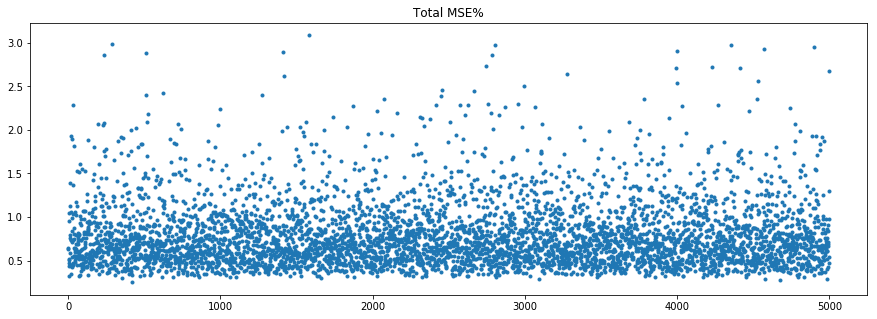

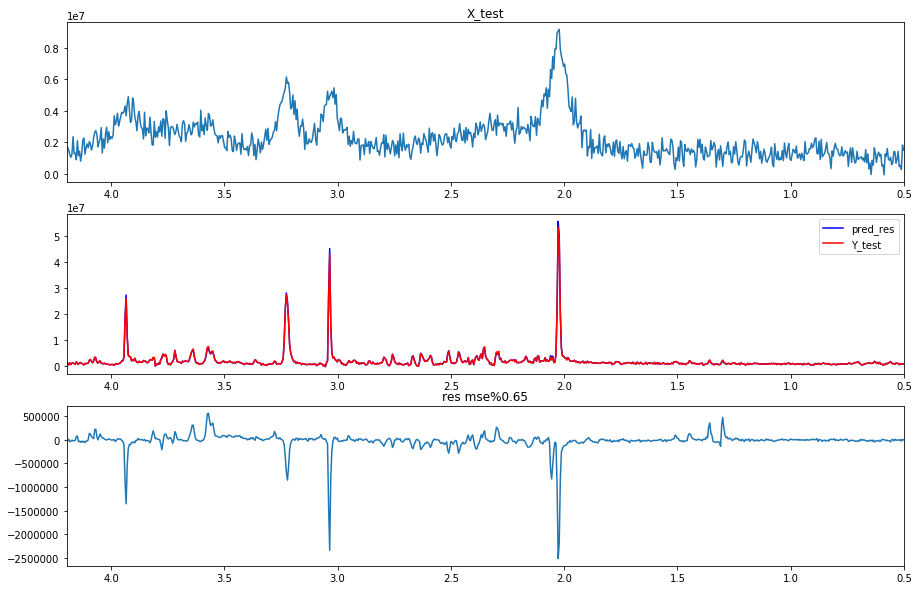

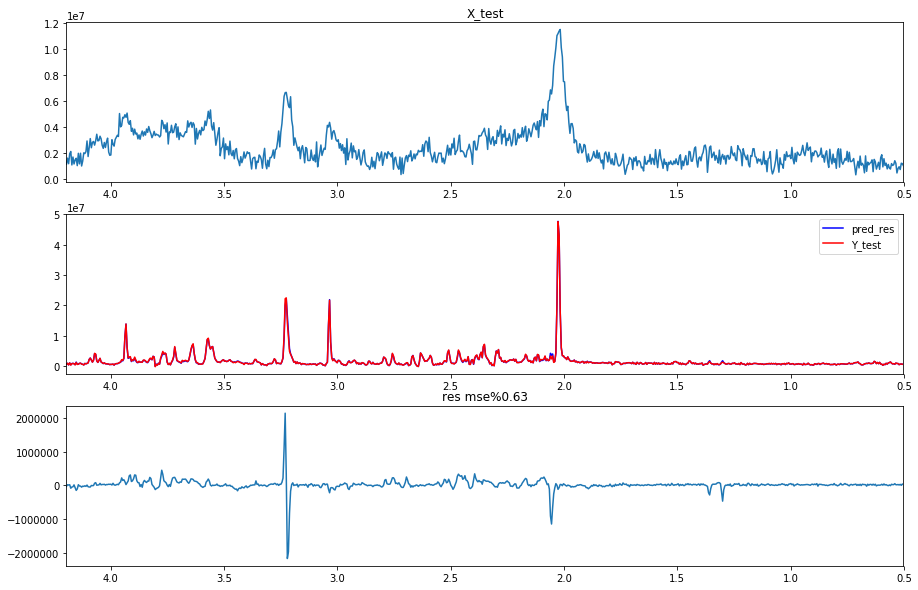

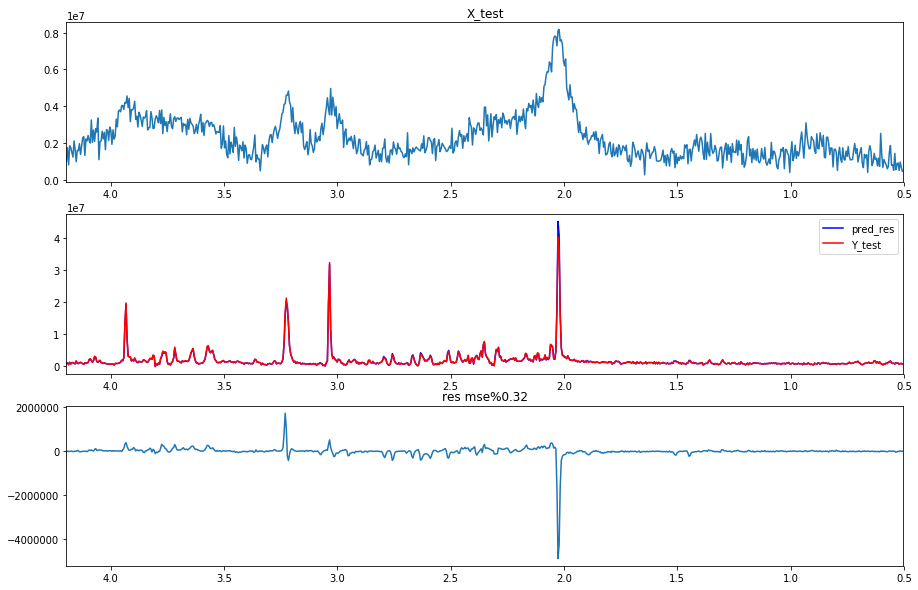

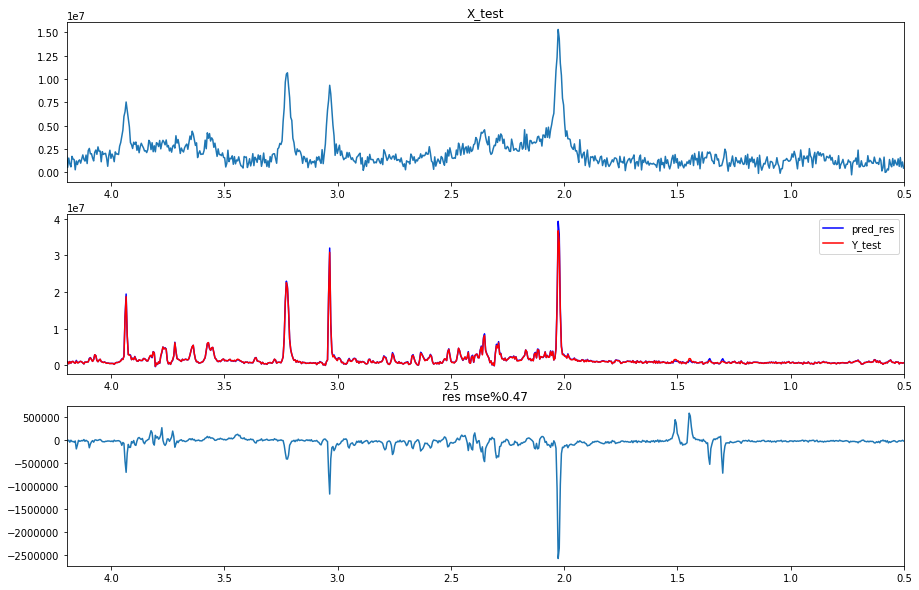

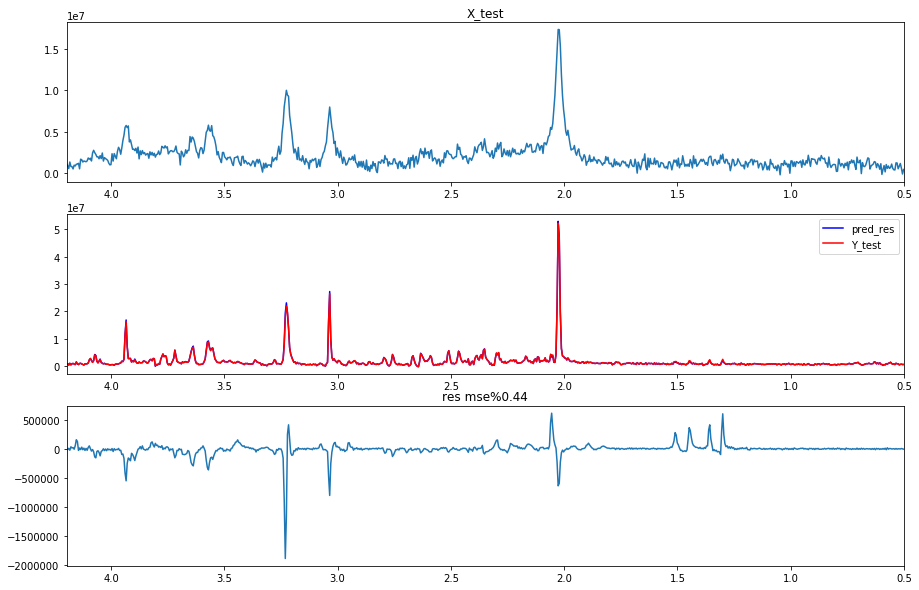

In [26]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#pred_res_view = pred_res[:,:774] + 1j*(pred_res[:,774:])
pred_res_view = pred_res
print('pred_res.shape!!',pred_res.shape)#(2, 837)

#X_test_view = X_test[:,:,:,0] + 1j*(X_test[:,:,:,1])
X_test_view = X_test
#Y_test_view = Y_test[:,:774] + 1j*(Y_test[:,774:])
Y_test_view = Y_test
#X_test_view = X_test_view*10

#plot total mse on test set
total_err = Y_test_view.real - pred_res_view.real
total_err_sqr = np.square(total_err)
total_msep = (np.mean(total_err_sqr,axis = 1)/np.max(total_err_sqr, axis = 1))*100

plt.figure(figsize=(15,5))
plt.title('Total MSE%')
plt.plot(total_msep,'.')
#td = np.array(np.where(total_msep > 6))[0]
td = np.array(np.where(total_msep > 0))[0]
td = td[:5]
print('td shape',td.shape)

#num = 10
#for num in range(2):
for num in td:
    #plt.figure(figsize=(15,15))
    plt.figure(figsize=(15,10))#寬, 高
    plt.subplot(311)
    plt.title('X_test')
    plt.plot(crop_ppm, X_test_view[num])
    plt.xlim(crop_ppm.max(),crop_ppm.min())
    plt.subplot(312)
    #plt.title('pred_res')
    plt.plot(crop_ppm, pred_res_view[num],label = 'pred_res',color='b')
    plt.xlim(crop_ppm.max(),crop_ppm.min())
    #plt.xlim(500,540)
    #plt.ylim(0,6e7)
    #plt.subplot(413)
    #plt.title('Y_test')
    plt.plot(crop_ppm, Y_test_view[num],label = 'Y_test',color='r')
    plt.xlim(crop_ppm.max(),crop_ppm.min())    
    plt.legend(loc='upper right')
    #plt.xlim(500,540)
    #plt.ylim(0,6e7)
   
    plt.subplot(313)
    err = ((Y_test_view[num]).real- (pred_res_view[num]).real)
    err_square = np.square(err)    
    msep = (np.mean(err_square)/err_square.max())*100
    plt.title(f'res mse%{round(msep, 2)}')
    plt.plot(crop_ppm, err)
    plt.xlim(crop_ppm.max(),crop_ppm.min())    
    #plt.ylim(-1e6,3e+7)


## If sent Y in model as X...

y_input (5000, 774)
y_input (5000, 774, 1)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 236us/step


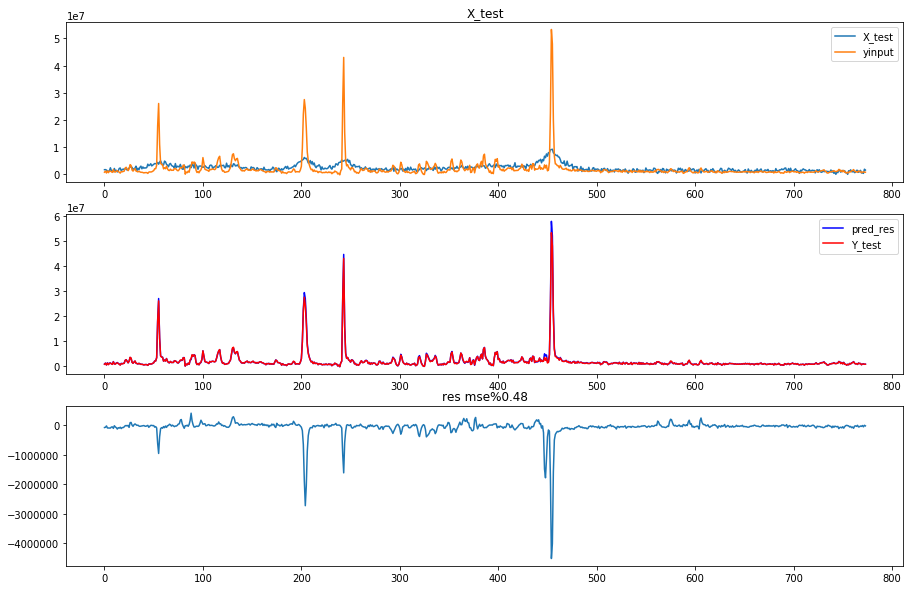

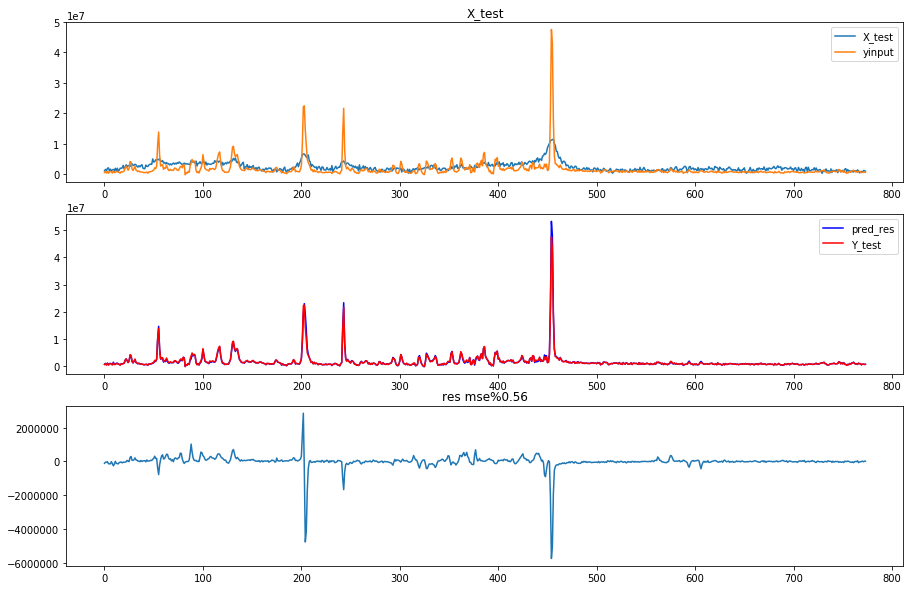

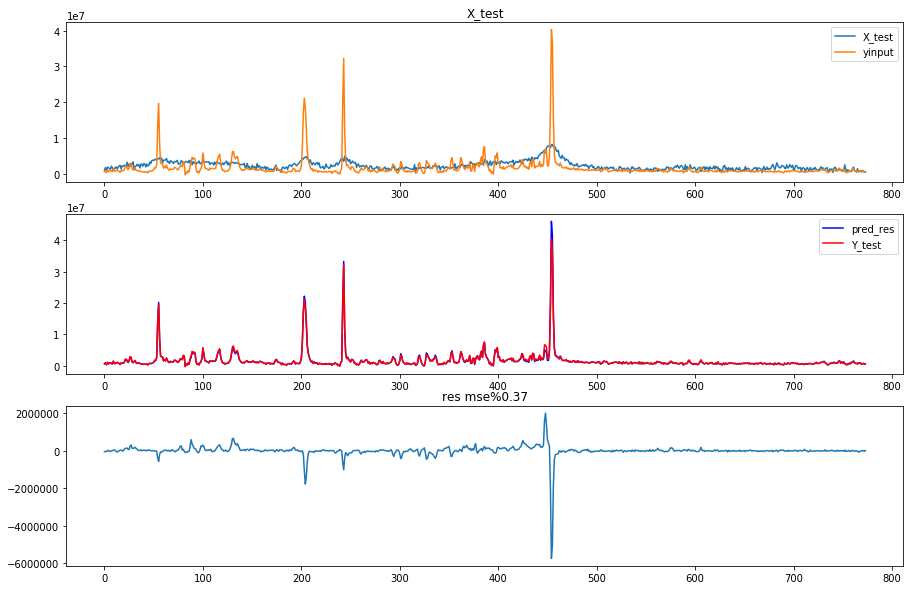

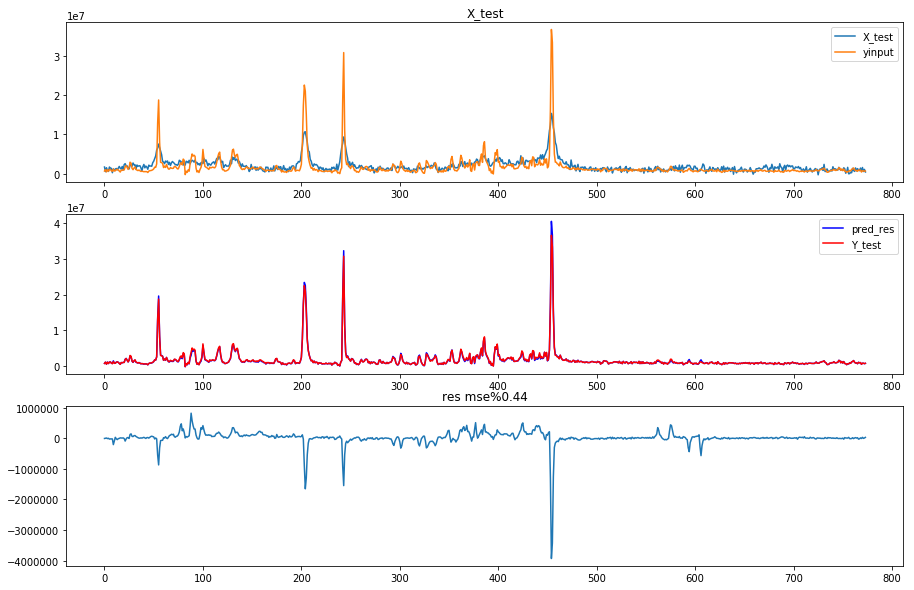

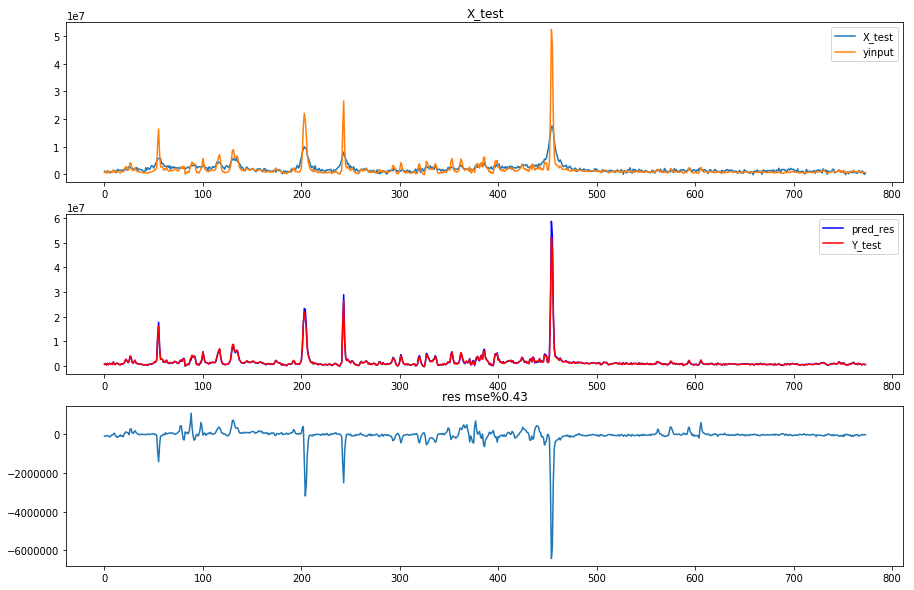

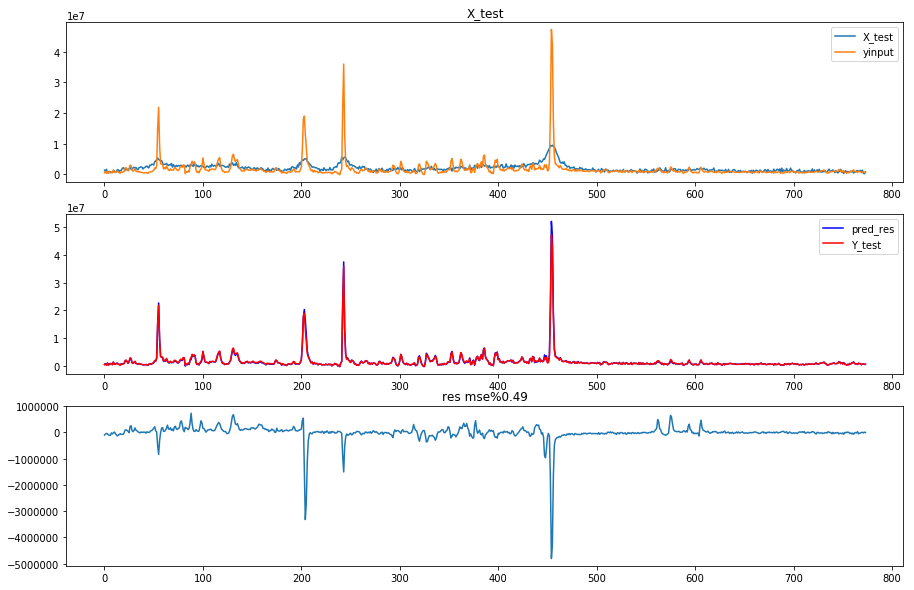

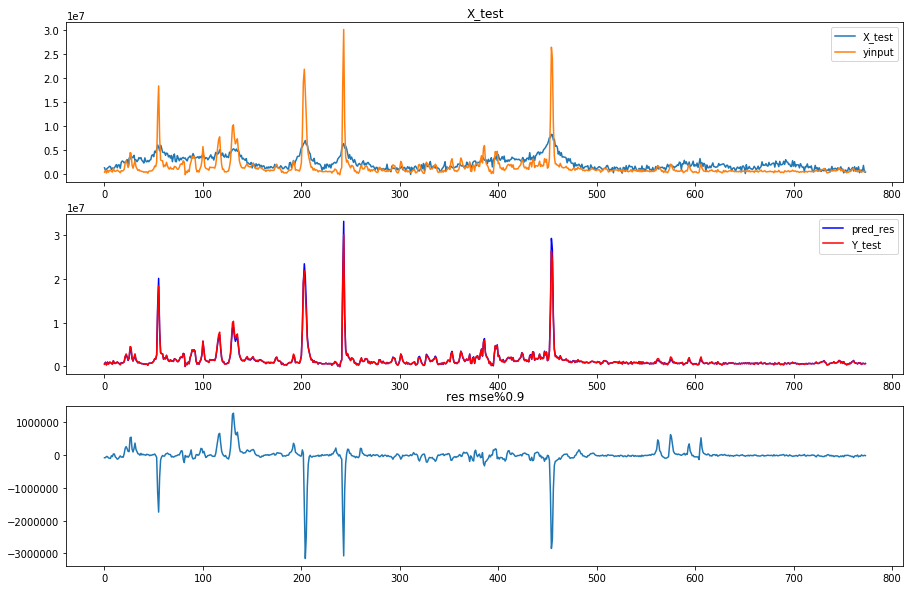

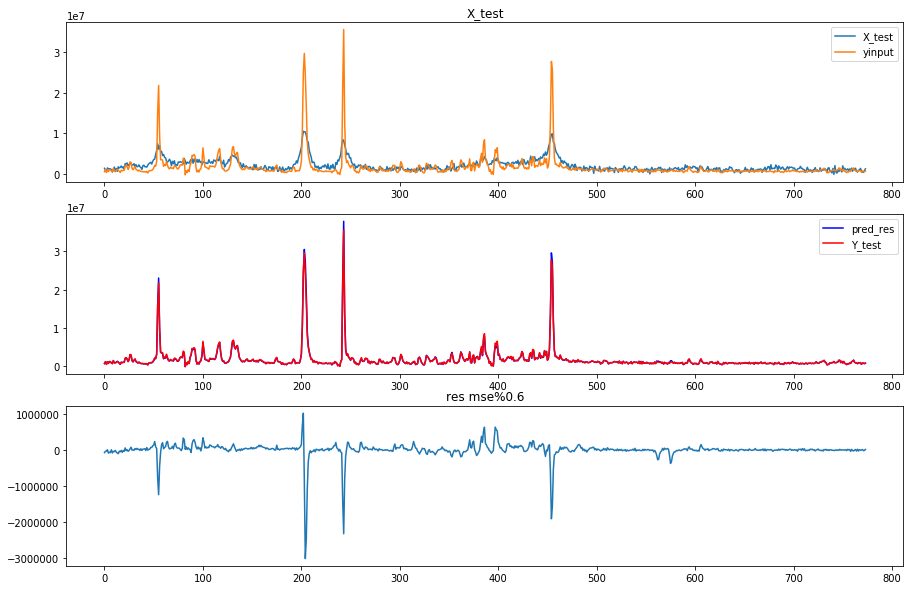

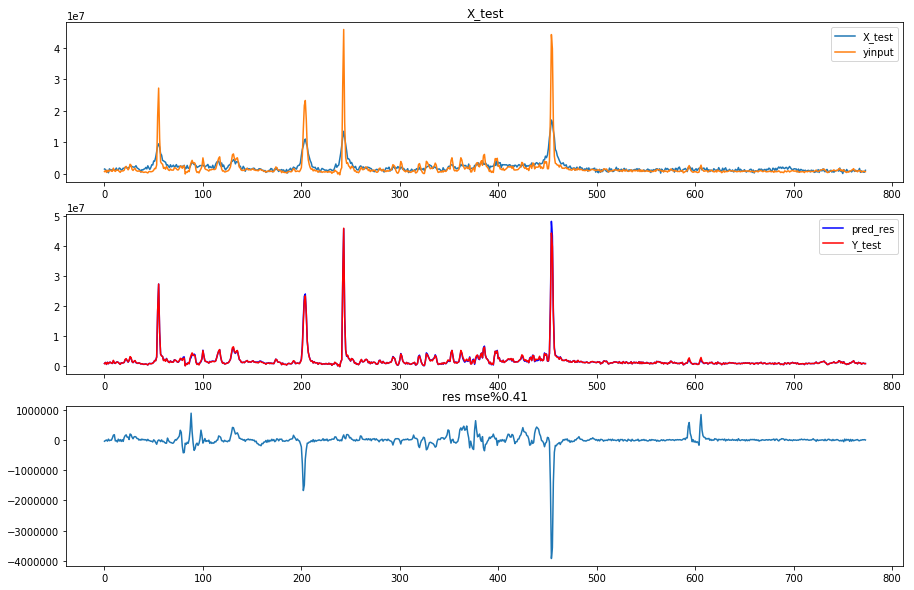

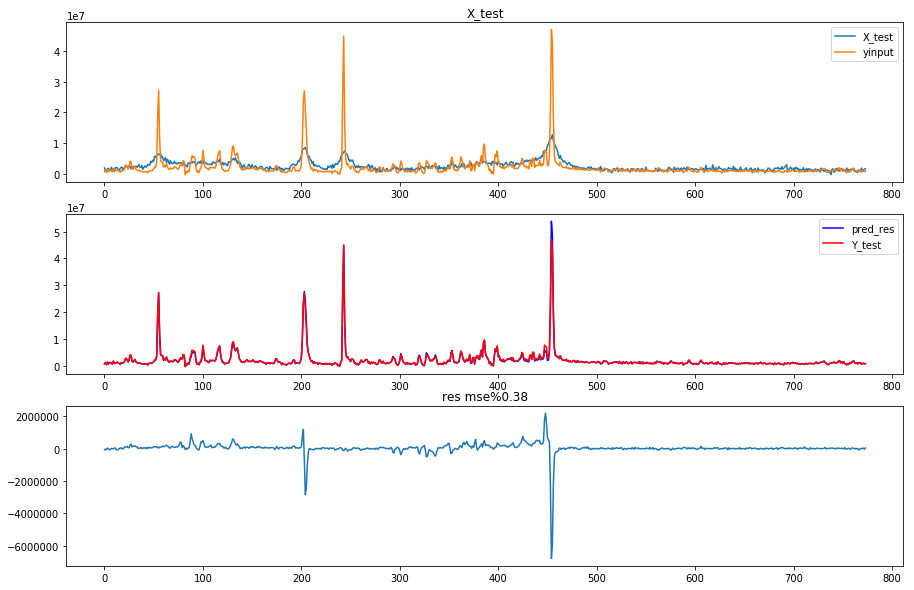

In [46]:
#y_input = Y_test[:,:774] + 1j*(Y_test[:,774:])
y_input = Y_test
print('y_input',y_input.shape)
y_input = np.expand_dims(y_input, axis = 2)
print('y_input',y_input.shape)
#y_input = np.append(y_input.real, y_input.imag , axis = 2)

pred_res = model.predict(y_input, verbose=1)
#pred_res = model.predict(X_test, verbose=1)

pred_res_view = pred_res

X_test_view = X_test
Y_test_view = Y_test
yinput_view = y_input

for num in range(10):
    plt.figure(figsize=(15,10))#寬, 高
    plt.subplot(311)
    plt.title('X_test')
    plt.plot(X_test_view[num],label='X_test')
    plt.plot(yinput_view[num],label='yinput')
    plt.legend(loc='upper right')    
    plt.subplot(312)
    plt.plot(pred_res_view[num],label = 'pred_res',color='b')
    plt.plot(Y_test_view[num],label = 'Y_test',color='r')
    plt.legend(loc='upper right')
    plt.subplot(313)
    err = ((Y_test_view[num]).real- (pred_res_view[num]).real)
    err_square = np.square(err)    
    msep = (np.mean(err_square)/err_square.max())*100
    plt.title(f'res mse%{round(msep, 2)}')
    plt.plot(err)


## Quantification

[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/Cr']]
5000


HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

MAPE describe
names          Ala          Asp           Cr         GABA          Glc  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     51.384348    17.191431     2.948369    16.956751    15.660326   
std      75.224830    11.016350     2.414907    10.954299    10.387914   
min       0.020888     0.012210     0.000117     0.001810     0.000296   
25%      13.572989     8.338475     1.125157     8.361416     7.447983   
50%      27.360724    16.294212     2.383250    15.925954    14.647141   
75%      49.646191    23.654941     4.219321    23.519293    21.934196   
max     733.751906    56.515228    18.975615    54.756017    59.046538   

names          Gln          Glu          GPC          PCh          Lac  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     11.309629     5.920685    12.512203    12.114578    38.625749   
std       8.452871     4.918832    12.967794    12.453680    36.538592   
min       0.000365     

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

SE describe
names          Ala          Asp           Cr         GABA          Glc  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.023990     0.035137    -0.092260     0.028617     0.035449   
std       0.296805     0.287305     0.249751     0.283376     0.265455   
min      -0.956174    -0.569994    -1.150791    -0.559080    -0.601179   
25%      -0.189441    -0.207663    -0.253782    -0.215714    -0.183550   
50%       0.024376     0.034225    -0.102139     0.027433     0.034267   
75%       0.236060     0.282331     0.057884     0.268902     0.255634   
max       0.967175     0.603614     1.279289     0.628179     0.651412   

names          Gln          Glu          GPC          PCh          Lac  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.114417    -0.042802    -0.027682     0.002868     0.024915   
std       0.604202     0.660325     0.171717     0.171273     0.215628   
min      -1.959314    -2.

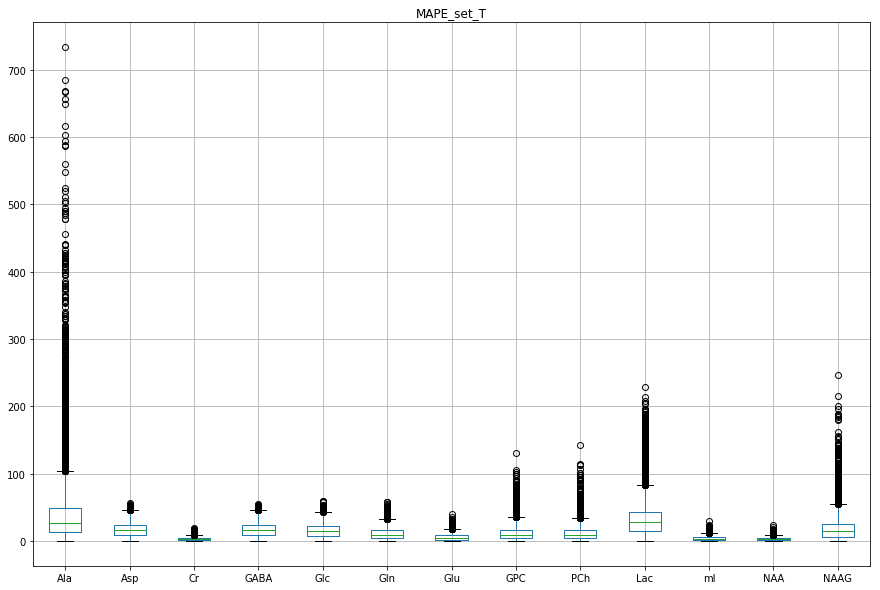

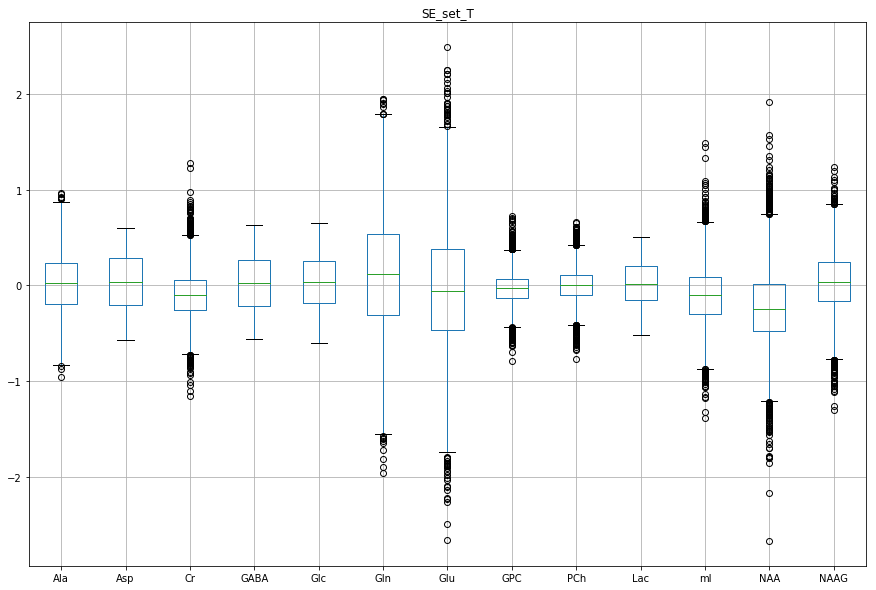

In [27]:
# Change metabo data type to dataframe for stactistic uses, and replace index to metabo name.
brain_metabo_index =  brain_conc_set[0].index
pd_conc_table_test =  pd.DataFrame(conc_table_test).T
pd_conc_table_test = pd_conc_table_test.set_index(brain_metabo_index)

add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/Cr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/Cr'])
#print(add_metabo_index)
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)
#pd.set_option('display.max_columns', None)

rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#gamma
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

#base_basis_set = base_basis_set.real/Y_test_max_real

#pred_res_view = pred_res_view * x_test_std
#pred_res_view = np.multiply(pred_res_view.real.T, (x_test_std)).T

#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], 
#[7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], 
#[14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tNAA'], [18, 'mI/tNAA'], [19, 'tCho/tNAA'], [20, 'tCr/tNAA']]

pinv_b = np.linalg.pinv(base_basis_set.real)
print(len(pred_res_view))
for i in tqdm_notebook(range(len(pred_res_view))):
    C = np.matmul(pred_res_view[i].real, pinv_b)
    Y_conc = pd_conc_table_test[i][:-2]
    
    MAPE = (abs(Y_conc - C)/Y_conc)*100    
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])    
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    #C_set[i] = C/C[2]
    C_set[i] = C
    
    if i == 0:
        MAPE_set = MAPE
    else:
        MAPE_set = pd.concat([MAPE_set, MAPE], axis=1)

#gamma basis had little different in tNAA....

#pd.describe_option("display.max_rows")
#print('MAPE')
#print(MAPE_set)
print('MAPE describe')
print(MAPE_set.T.describe())

#print('Already /Cr')
#print(C_set.loc[["Cr", "Glu","mI","tNAA","tCr","tCho","Glx"]])#Already /Cr
#print('Statistic')
#print(C_set.loc[["Cr", "Glu","mI","tNAA","tCr","tCho","Glx"]].T.describe())#Already /Cr

MAPE_set_T = MAPE_set.T
#print(MAPE_set_T.describe())
plt.figure(figsize=(15,10))
plt.title('MAPE_set_T')
boxplot = MAPE_set_T.boxplot()

print('Subtraction error, SE')
for i in tqdm_notebook(range(len(pred_res_view))):
    C = np.matmul(pred_res_view[i].real, pinv_b)
    Y_conc = pd_conc_table_test[i][:-2]
    SE = Y_conc - C
    #MAPE = (abs(Y_conc - C)/Y_conc)*100
    if i == 0:
        SE_set = SE
    else:
        SE_set = pd.concat([SE_set, SE], axis=1)
    
#print('SE')
#print(SE_set)
print('SE describe')
print(SE_set.T.describe())

SE_set_T = SE_set.T
plt.figure(figsize=(15,10))
plt.title('SE_set_T')
boxplot = SE_set_T.boxplot()
#plt.ylim(-1,40)


In [10]:
brain_metabo_index =  brain_conc_set[0].index
pd_conc_table_test =  pd.DataFrame(conc_table_test).T
pd_conc_table_test = pd_conc_table_test.set_index(brain_metabo_index)

add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

print(add_metabo_index)
C = pd_conc_table_test[:-2]
C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),C.shape[1]]), index=add_metabo_index)

C_set.iloc[:13] = C


C_set.iloc[13] = C_set.iloc[11] + C_set.iloc[12]
C_set.iloc[14] = C_set.iloc[2]
C_set.iloc[15] = C_set.iloc[8] + C_set.iloc[7]
C_set.iloc[16] = C_set.iloc[5] + C_set.iloc[6]
C_set.iloc[17] = C_set.iloc[16] / C_set.iloc[13]
C_set.iloc[18] = C_set.iloc[10] / C_set.iloc[13]
C_set.iloc[19] = C_set.iloc[15] / C_set.iloc[13]
C_set.iloc[20] = C_set.iloc[14] / C_set.iloc[13]
#C_set = C_set/C_set.iloc[2]
C_set = C_set.loc[["Cr",'NAA','NAAG', "Glu","mI","tNAA","tCr","tCho","Glx"]]
print(C_set.T)

#dump_path = os.path.join(working_dir, 'simulated_data_conc_groundtruth.csv')
#C_set.T.to_csv(dump_path)



['Ala', 'Asp', 'Cr', 'GABA', 'Glc', 'Gln', 'Glu', 'GPC', 'PCh', 'Lac', 'mI', 'NAA', 'NAAG', 'tNAA', 'tCr', 'tCho', 'Glx', 'Glx/tNAA', 'mI/tNAA', 'tCho/tNAA', 'tCr/tNAA']
             Cr        NAA      NAAG        Glu        mI       tNAA  \
0      6.316618  10.876485  1.797886  11.825999  7.161877  12.674371   
1     10.286873  14.982846  2.210879  10.822992  6.015483  17.193724   
2      9.642405  16.542501  1.142260  12.441583  7.054964  17.684761   
3      4.616922  10.313630  1.742354   9.710979  6.825807  12.055985   
4      9.624785  12.103331  2.100086   7.238137  5.927368  14.203417   
5      8.790983  15.907108  0.771326  12.314645  8.896765  16.678434   
6      8.824559   9.946155  0.673394   6.620644  5.443656  10.619549   
7      5.225096  16.326939  1.599604   9.637616  6.331390  17.926543   
8      4.720236   9.900172  2.071210   6.316608  7.508541  11.971382   
9     10.286894   9.983336  0.964090  10.269410  6.347731  10.947425   
10     8.758305  11.649775  0.798493  

## If sent Y to deconvolute...

5000


HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

MAPE describe
names           Ala           Asp            Cr          GABA           Glc           Gln           Glu           GPC           PCh          Lac           mI          NAA          NAAG
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5000.000000  5000.000000  5000.000000  5.000000e+03
mean   7.785550e-06  3.376773e-06  2.051552e-06  2.694937e-06  4.839512e-06  4.701713e-06  4.588982e-06  5.912411e-06  3.074591e-06     0.000026     0.000008     0.000006  6.568471e-06
std    9.974558e-06  2.657019e-06  1.288019e-06  2.003223e-06  2.706277e-06  2.361625e-06  1.263415e-06  3.024258e-06  2.429301e-06     0.000011     0.000001     0.000002  2.608524e-06
min    2.727166e-09  8.659887e-10  3.378422e-10  2.140960e-09  2.081614e-09  9.385760e-09  9.157425e-07  1.537260e-09  3.925458e-10     0.000008     0.000005     0.000001  4.972583e-09
25%    2.127288e-06  1.348358e-06  9.686149e-07  1.093992e-06

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

SE describe
names           Ala           Asp            Cr          GABA           Glc           Gln           Glu           GPC           PCh           Lac            mI           NAA          NAAG
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03
mean  -3.280186e-08  1.106577e-08  1.451769e-07  2.780842e-08 -6.931013e-08  2.007820e-07 -4.092030e-07 -7.353195e-08 -1.356149e-08 -1.366134e-07 -5.423276e-07  7.303155e-07  9.891900e-08
std    3.437710e-08  6.070849e-08  1.140109e-07  4.116827e-08  3.784605e-08  8.806022e-08  9.200642e-08  4.993419e-08  4.429450e-08  2.975683e-08  1.162305e-07  2.595615e-07  5.170509e-08
min   -1.503500e-07 -2.365523e-07 -2.085361e-07 -1.384034e-07 -2.488626e-07 -1.058301e-07 -7.788910e-07 -2.556730e-07 -1.725489e-07 -2.396321e-07 -9.094476e-07  1.400813e-07 -3.083216e-08
25%   -5.668393e-08 -3.042239e-08  6.262942e-08 

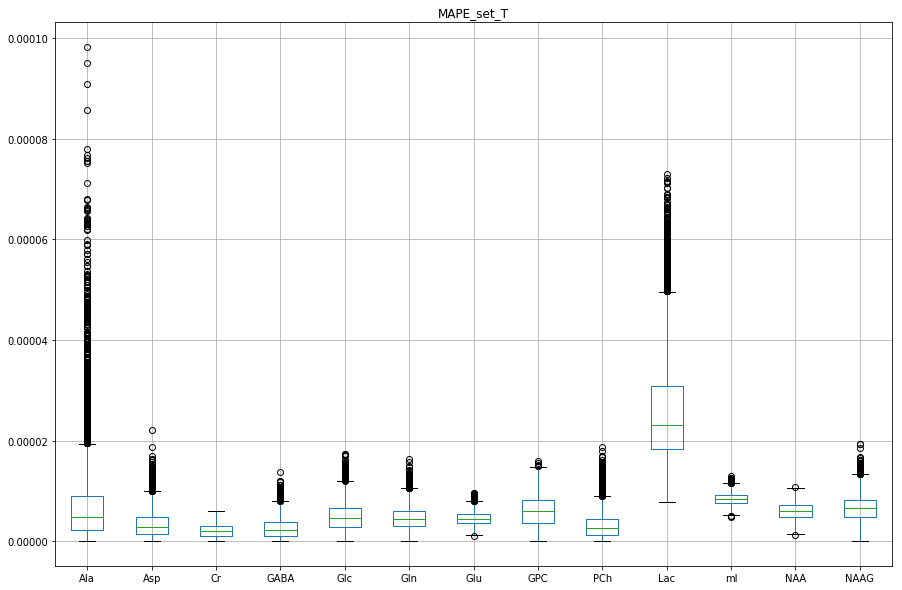

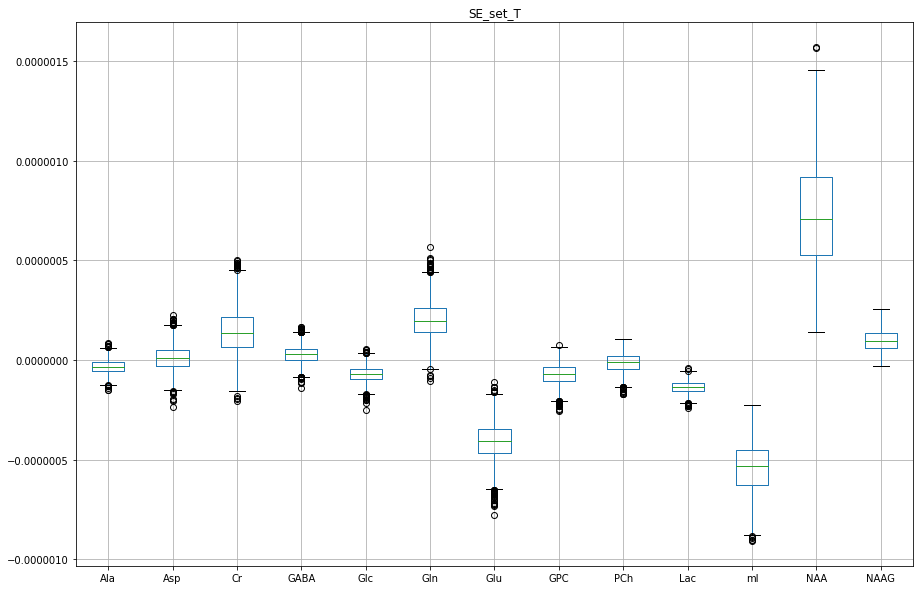

In [111]:
# Change metabo data type to dataframe for stactistic uses, and replace index to metabo name.
brain_metabo_index =  brain_conc_set[0].index
pd_conc_table_test =  pd.DataFrame(conc_table_test).T
pd_conc_table_test = pd_conc_table_test.set_index(brain_metabo_index)

add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res_view)]), index=add_metabo_index)

rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

#base_basis_set = base_basis_set.real/Y_test_max_real

#pred_res_view = pred_res_view * x_test_std
#pred_res_view = np.multiply(pred_res_view.real.T, (x_test_std)).T

pinv_b = np.linalg.pinv(base_basis_set.real)
print(len(pred_res_view))
for i in tqdm_notebook(range(len(pred_res_view))):
    Y_conc = pd_conc_table_test[i][:-2]
    
    C = np.matmul(Y_test[i].real, pinv_b)    
    MAPE = (abs(Y_conc - C)/Y_conc)*100    
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tNAA' = [16]/[13]
    C = np.append(C, C[16]/C[13])
    #'mI/tNAA' = [10]/[13]
    C = np.append(C, C[10]/C[13])    
    #'tCho/tNAA' = [15]/[13]
    C = np.append(C, C[15]/C[13])
    #'tCr/tNAA' = [14]/[13]
    C = np.append(C, C[14]/C[13])    
    #C_set[i] = C/C[2]
    C_set[i] = C
    
    if i == 0:
        MAPE_set = MAPE
    else:
        MAPE_set = pd.concat([MAPE_set, MAPE], axis=1)

#print('MAPE')
#print(MAPE_set)
print('MAPE describe')
print(MAPE_set.T.describe())

MAPE_set_T = MAPE_set.T
#print(MAPE_set_T.describe())
plt.figure(figsize=(15,10))
plt.title('MAPE_set_T')
boxplot = MAPE_set_T.boxplot()

print('Subtraction error, SE')
for i in tqdm_notebook(range(len(pred_res_view))):
    Y_conc = pd_conc_table_test[i][:-2]    
    C = np.matmul(Y_test[i].real, pinv_b)
    SE = Y_conc - C
    #MAPE = (abs(Y_conc - C)/Y_conc)*100
    if i == 0:
        SE_set = SE
    else:
        SE_set = pd.concat([SE_set, SE], axis=1) 
    
#print('SE')
#print(SE_set)
print('SE describe')
print(SE_set.T.describe())

SE_set_T = SE_set.T
plt.figure(figsize=(15,10))
plt.title('SE_set_T')
boxplot = SE_set_T.boxplot()
#plt.ylim(-1,40)


# Phantom
## Read data and averge

## Measure Hz and freq_shift_correction

In [4]:
def measure_width_hz(ppm, spectrum_data):
    if (spectrum_data.ndim == 2):
        spectrum_data = spectrum_data[:,0]
    tNAA_pos = np.where((ppm>=1.8) & (ppm<=2.2))
    tNAA_crop = spectrum_data[tNAA_pos]
    #tNAA_FWHM_val = max(tNAA_crop)*0.2
    tNAA_FWHM_val = max(tNAA_crop)*(1-0.707)
    tNAA_FWHM = np.where(tNAA_crop > tNAA_FWHM_val)
    tNAA_FWHM_width_ppm = max(ppm[tNAA_pos][tNAA_FWHM])-min(ppm[tNAA_pos][tNAA_FWHM])
    #ppm to Hz, (BW)/(total ppm = BW/B) * width_ppm = B*width_ppm
    tNAA_FWHM_width_hz = round(123.177*tNAA_FWHM_width_ppm, 3)
    return tNAA_FWHM_width_hz
#print('measure_width_hz',measure_width_hz(ppm, avg_ws_datasets_val))

def freq_shift_corr(ppm, spectrum_data):
    #print('spectrum_data.shape',spectrum_data.shape)
    tNAA_pos = np.where((ppm>=1.5) & (ppm<=2.5))
    NAA_peak_pos = np.array(np.where((spectrum_data == max(spectrum_data[tNAA_pos]))))[0]
    if len(NAA_peak_pos) > 1:
        NAA_peak_pos = int(NAA_peak_pos[0])
    ppm_2 = (np.abs(ppm - 2.0)).argmin()#The number was the cloest one to 2 ppm
    diff = NAA_peak_pos - ppm_2
    shift_point = NAA_peak_pos - ppm_2
    shift_correction = np.roll(spectrum_data,-shift_point)
    return shift_correction

def measure_peak_phase(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    return corr_spectrum[origin_peak_pos].imag

def measure_peak_area(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    origin_peak_range = np.where((ppm >= 4) & (ppm <= 5))
    area = np.sum(corr_spectrum[origin_peak_range].real)*abs(ppm[0]-ppm[1])
    return area

def cal_area(ppm, spectrum):
    spectrum_max = spectrum.real.max()
    area_threadshold = spectrum_max*(1-0.99)
    area_pos_range = np.where(spectrum >= area_threadshold)
    area_pos_range_byppm = np.where((ppm >= 4) & (ppm <= 5))
    print('Points in Area:',len(area_pos_range_byppm[0]))
    area_range = spectrum[area_pos_range]
    area = round(np.sum(area_range).real*abs(ppm[0]-ppm[1]), 5)#print('Area by threadshold = %E' %area)
    area_byppm = round(np.sum(spectrum[area_pos_range_byppm].real)*abs(ppm[0]-ppm[1]), 5)
    abs_area = round(np.sum(abs(area_range.real))*abs(ppm[0]-ppm[1]), 5)#Area by threadshold_ABS
    total_area = round(np.sum(spectrum).real*abs(ppm[0]-ppm[1]), 5)#All spectrum area
    total_area_abs = round(np.sum(abs(spectrum.real))*abs(ppm[0]-ppm[1]), 5)#All spectrum area ABS
    print('ppm_gap', ppm[0]-ppm[1])
    print('Spectrum area byppm = %E' %area_byppm)
    plt.figure()
    plt.title('Spectrum area byppm = %E' %area_byppm)
    plt.plot(ppm,spectrum)
    plt.plot(ppm[area_pos_range_byppm],spectrum[area_pos_range_byppm],color='r')
    plt.xlim(5.1,3.9)
    return area_byppm

###########################Zero-phase correction###########################
def zero_phase_corr(nws_data):    
    FT_M = np.abs(nws_data)
    FT_P = np.angle(nws_data, deg=True)
    var_phi_range = np.arange(-180, 180)
    phase_val = np.zeros([len(var_phi_range)])
    area_val = np.zeros([len(var_phi_range)])

    ######Find phase min######
    for idx, var_phi in enumerate(var_phi_range):
        angle = var_phi
        new_phase = FT_P + angle
        new_spectrum = nws_data * 0
        new_theada = new_phase * (np.pi / 180)
        new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
        phase_val[idx] = abs(measure_peak_phase(ppm,nws_data, new_spectrum))
        area_val[idx] = measure_peak_area(ppm,nws_data, new_spectrum)
    #angle = var_phi_range[np.argmin(abs(phase_val))]
    #print('(phase_val)',(phase_val).min())
    angle = var_phi_range[np.argmax(area_val)]

    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    print('angle',angle)

    new_spectrum = nws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum
###########################Zero-phase correction###########################

## SNR Part

files ['NSA_8.npz', 'NSA_16.npz', 'NSA_24.npz', 'NSA_32.npz', 'NSA_40.npz', 'NSA_48.npz', 'NSA_56.npz', 'NSA_64.npz', 'nws_data.npz']


HBox(children=(IntProgress(value=0, max=9), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004777164271009049
angle 19
Points in Area: 130
ppm_gap 0.007693224961435874
Spectrum area byppm = 7.007717E+06


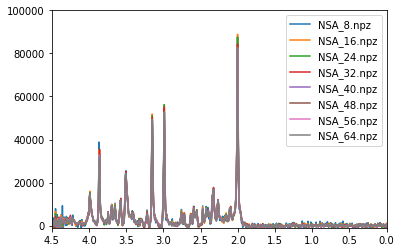

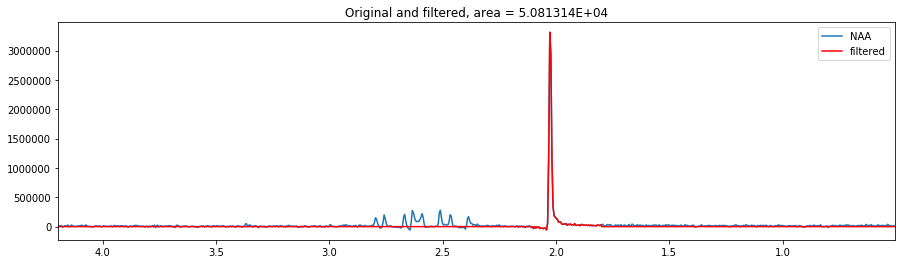

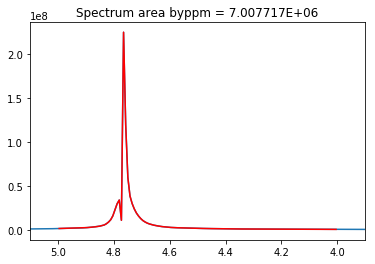

In [5]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_to_model')

ws_NSA_datasets = np.zeros((8,2048,),dtype=np.csingle)
nws_data = np.zeros((1,2048,),dtype=np.csingle)

files = [ f for f in os.listdir(phantom_to_model_path) if os.path.isfile(os.path.join(phantom_to_model_path,f)) ]
files = sorted(files, key=lambda x: x[-7])#倒數三個不看
print('files',files)

count = 0
plt.figure()
for idx, cont in enumerate(tqdm_notebook(files)):
    if cont == 'nws_data.npz':
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
    else:
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        ppm_2048 = ppm
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_NSA_datasets[idx,:] = ws_read_data
        plt.plot(ppm, ws_NSA_datasets[idx,:],label=f'{files[idx]}')
        plt.xlim(4.5,0)
        plt.ylim(-1000,100000)
        plt.legend(loc='upper right')

##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(phantom_to_model_path, files[0]))
ppm = read_data['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])

water_conc = 55556

denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    #thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #LCModel basis
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
        ##########Visualize spectra##########
        plt.figure(figsize=(15,4))
        plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.legend(loc='upper right')
        
    '''    
    #gamma basis
    if i ==12:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
        ##########Visualize spectra##########
        plt.figure(figsize=(15,4))
        plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.legend(loc='upper right')
    '''
        
##########################################Basis filter#########################################

########################算NWS 面積囉######################
new_spectrum = zero_phase_corr(nws_data)
abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
########################得NWS 面積########################

norm_coefficient_real 268.55868235177905


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


X_input shape: (2, 774, 1), pred_res shape: (2, 774)
0
X_input (2, 774, 1)
1
X_input (2, 774, 1)
add_metabo_index
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
##############Directly subtraction##############
real_conc
Cr       5.717962
Glu      6.423092
Gln      3.396589
NAA     11.489465
NAAG     0.011788
mI       4.043199
tNAA    11.501253
tCho     1.678971
Glx      9.819681
Name: 1, dtype: float32
/Cr
tNAA/tCr    2.011425
tCr/tCr     1.000000
tCho/tCr    0.293631
mI/tCr      0.707105
Glx/tCr     1.717339
Name: 1, dtype: float32


'\nThe metabolite conc. in phantom report in literature are\nNAA: 12.5 mM\nCr: 10 mM\nCho: 3 mM\nmI: 7.5 mM\nGlu: 12.5 mM\n\n/Cr\nNAA: 1.25\nCr: 1\nCho: 0.3\nmI: 0.75\nGlu: 1.25\n\n'

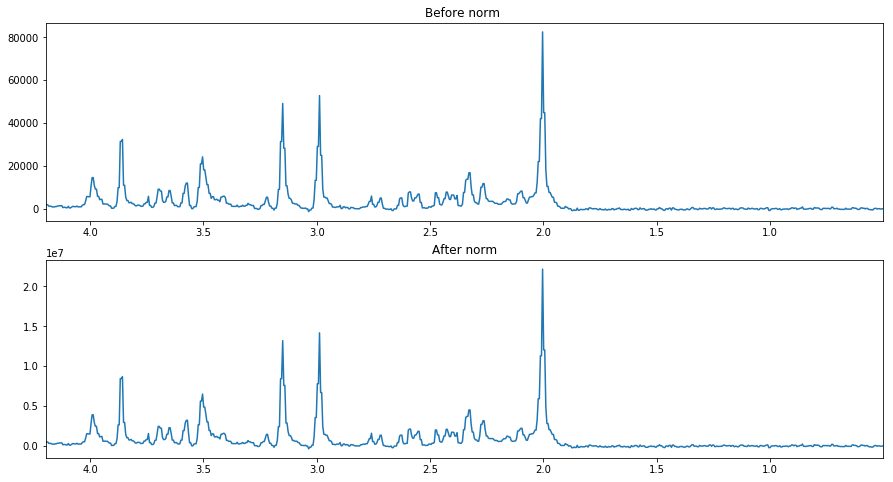

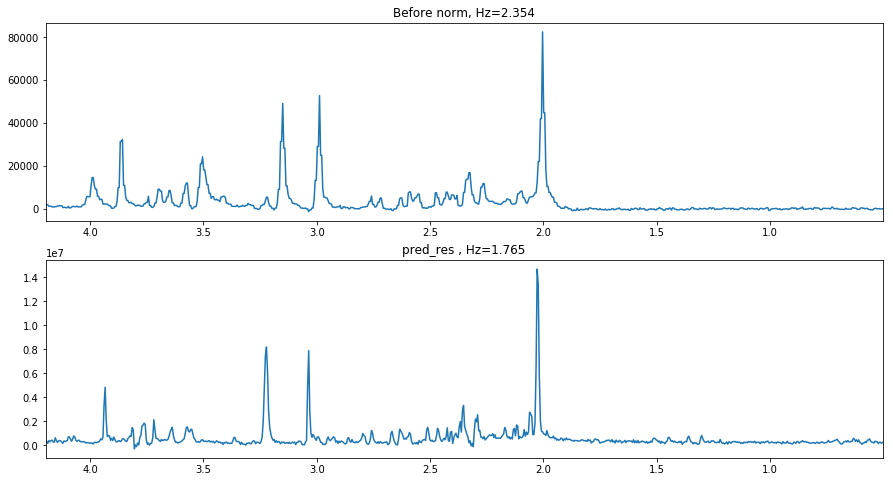

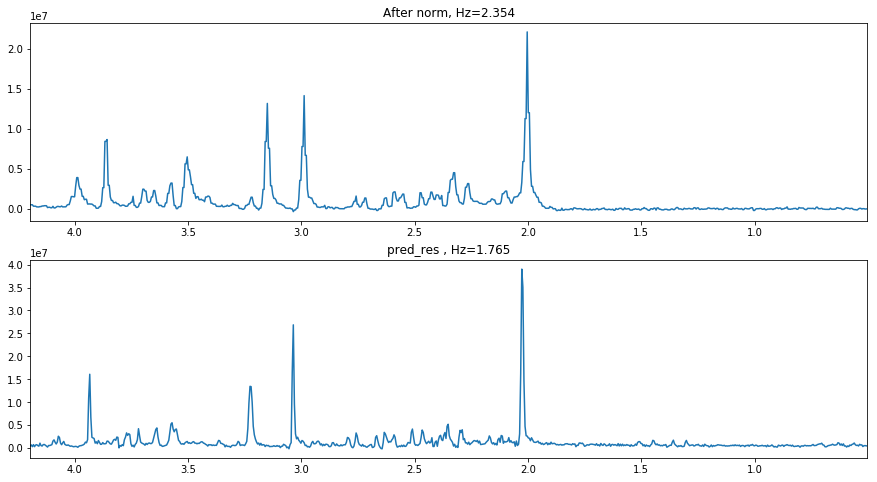

In [6]:
#measure NAA basis
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.5))
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]


#norm_coefficient_real = 1.99E+02
#abs_real_NWS_area = abs_real_NWS_area*2
norm_coefficient_real = w_area / abs_real_NWS_area
#norm_coefficient_real = w_area / (abs_real_NWS_area*4)
norm_coefficient_imag = norm_coefficient_real
print('norm_coefficient_real',norm_coefficient_real)

#NSA_64_ori = ((NSA_64_ori.real) * norm_coefficient_real) + 1j*((NSA_64_ori.imag) * norm_coefficient_imag)

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

real_f = interpolate.interp1d(x,NSA_64_ori.real,kind="nearest")
imag_f = interpolate.interp1d(x,NSA_64_ori.imag,kind="nearest")
interpo_NSA_64_ori = real_f(interpo_x) + 1j*(imag_f(interpo_x))
#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(interpo_x,interpo_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

norm_NSA_64_ori = ((interpo_NSA_64_ori.real) * norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) * norm_coefficient_imag)
#norm_NSA_64_ori = ((interpo_NSA_64_ori.real) / norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) / norm_coefficient_imag)
#norm_NSA_64_ori = interpo_NSA_64_ori
norm_NSA_64_ori = np.expand_dims(norm_NSA_64_ori, axis = 1)

plt.subplot(212)
plt.title('After norm')
plt.plot(interpo_x,norm_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)
compare_NSA64_norm = np.append(interpo_NSA_64_ori.real, norm_NSA_64_ori.real,axis = 1)

X_input = np.expand_dims(compare_NSA64_norm.T,axis = 2)#NSA data

pred_res = model.predict(X_input, verbose=0)

print(f'X_input shape: {X_input.shape}, pred_res shape: {pred_res.shape}')

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    
# Solve matrix problem to quantification
#NORM_PRED = pred_res[1]
#print('NORM_PRED',NORM_PRED.shape)
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(denoise_basis_set.real)
print('add_metabo_index')
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
pd.set_option('display.max_columns', None)

pinv_b = np.linalg.pinv(base_basis_set.real)


#for LCM basis
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])    
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    #'tCr/tCr' = [14]/[14]
    C = np.append(C, C[14]/C[14])    
    #C_set[i] = C/C[2]
    C_set[i] = C

'''
#For gamma basis
#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], 
#[7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], 
#[14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], 
#[20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]


for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [12] + [13]
    C = np.append(C, C[12]+C[13])
    #tCr = Cr + PCr, [2]+[3]
    C = np.append(C, C[2]+C[3])
    #tCho = PC + GPC, [8]+[9]
    C = np.append(C, C[8]+ C[9])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[6]+C[7])
    #'Glx/tCr' = [17]/[15]
    C = np.append(C, C[17]/C[15])
    #'mI/tCr' = [10]/[15]
    C = np.append(C, C[10]/C[15])    
    #'tCho/tCr' = [16]/[15]
    C = np.append(C, C[16]/C[15])
    #'tNAA/tCr' = [14]/[15]
    C = np.append(C, C[14]/C[15])
    #'tCr/tCr' = [15]/[15]
    C = np.append(C, C[15]/C[15])    
    C_set[i] = C

'''

print('##############Directly subtraction##############')
#print(C_set.T.iloc[0] - C_set.T.iloc[1])
#print('##############Subtraction percentage##############')
#print(C_set.T)
#print(C_set.T.describe())

real_conc = C_set[1]

print('real_conc')
print(real_conc.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
#gamma
#print(real_conc.loc[["Cr","PCr","Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx","tCr"]])
#print(real_conc.loc[['NAA',"Cr","PCr","tCho","mI","Lac","Glu",'Gln','NAAG',"tNAA","Glx","tCr"]])
#print(real_conc)

print('/Cr')
print(real_conc.loc[["tNAA/tCr", "tCr/tCr","tCho/tCr","mI/tCr","Glx/tCr"]])
#cr_ratio = real_conc/real_conc.iloc[2]
#print(cr_ratio.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
'''
The metabolite conc. in phantom report in literature are
NAA: 12.5 mM
Cr: 10 mM
Cho: 3 mM
mI: 7.5 mM
Glu: 12.5 mM

/Cr
NAA: 1.25
Cr: 1
Cho: 0.3
mI: 0.75
Glu: 1.25

'''

## 借比較 original and original * ws scale to LCM

In [78]:
#measure NAA basis
#rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.2))
pos = np.where((ppm>ppm.min()) & (ppm<=ppm.max()))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]

#norm_coefficient_real = w_area / abs_real_NWS_area
norm_coefficient_real = 1
norm_coefficient_imag = norm_coefficient_real

print('norm_coefficient_real',norm_coefficient_real)

norm_NSA_64_ori = ((NSA_64_ori.real) * norm_coefficient_real) + 1j*((NSA_64_ori.imag) * norm_coefficient_imag)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(crop_ppm,NSA_64_ori)
plt.xlim(crop_ppm.max(),crop_ppm.min())

plt.subplot(212)
plt.title('After norm')
plt.plot(crop_ppm,norm_NSA_64_ori)
plt.xlim(crop_ppm.max(),crop_ppm.min())


pad_NORM_PRED = np.zeros([2048,],dtype=np.csingle)

##############################################

'''
#####################ppm config#####################
sample_point = 2048
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse
#####################ppm config#####################
'''
ppm_cord_max = crop_ppm.max()
pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('norm_NSA_64_ori[0]',norm_NSA_64_ori[0])

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(norm_NSA_64_ori)] = norm_NSA_64_ori
pad_NORM_PRED = np.expand_dims(pad_NORM_PRED,axis=1)

#plt.figure(figsize=(15,10))
plt.figure(figsize=(15,8))
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',(pad_NORM_PRED).shape)

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'try_norm_pred_lcm')
'''
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('sdata real')
plt.plot(ppm,pad_NORM_PRED.real)
plt.subplot(212)
plt.title('sdata imag')
plt.plot(ppm,pad_NORM_PRED.imag)
'''

import scipy.io as sio
sio.savemat(os.path.join(dump_path,'snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
# For no nws
#sio.savemat(os.path.join(dump_path,'nonws_snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})

norm_coefficient_real 1


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 0
norm_NSA_64_ori[0] (302.57983+643.70776j)
len(pad_NORM_PRED) (2048, 1)


## If deconv. original spectrum directly...?

norm_coefficient_real 8.176223699133582e-08


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


X_input shape (2, 467, 1)
0
X_input (2, 467, 1)
1
X_input (2, 467, 1)
add_metabo_index
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], [7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], [14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], [20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]
##############Directly subtraction##############
real_conc
Cr      0.000850
Glu     0.033069
Gln     0.032348
NAA     0.032161
NAAG    0.007336
mI      0.015436
tNAA    0.032572
tCho    0.035679
Glx     0.096819
Name: 1, dtype: float32
/Cr
tNAA/tCr    0.225235
tCr/tCr     1.000000
tCho/tCr    0.026092
mI/tCr      0.473909
Glx/tCr     1.095384
Name: 1, dtype: float32


'\nThe metabolite conc. in phantom report in literature are\nNAA: 12.5 mM\nCr: 10 mM\nCho: 3 mM\nmI: 7.5 mM\nGlu: 12.5 mM\n\n/Cr\nNAA: 1.25\nCr: 1\nCho: 0.3\nmI: 0.75\nGlu: 1.25\n\n'

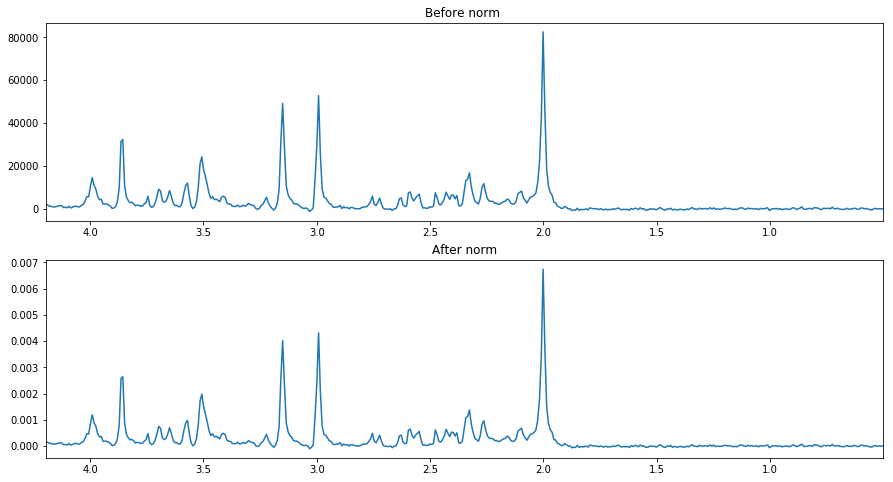

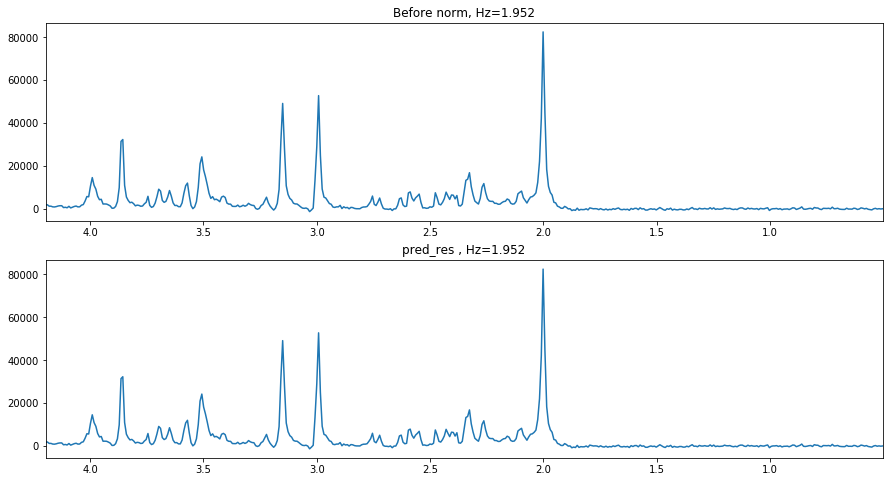

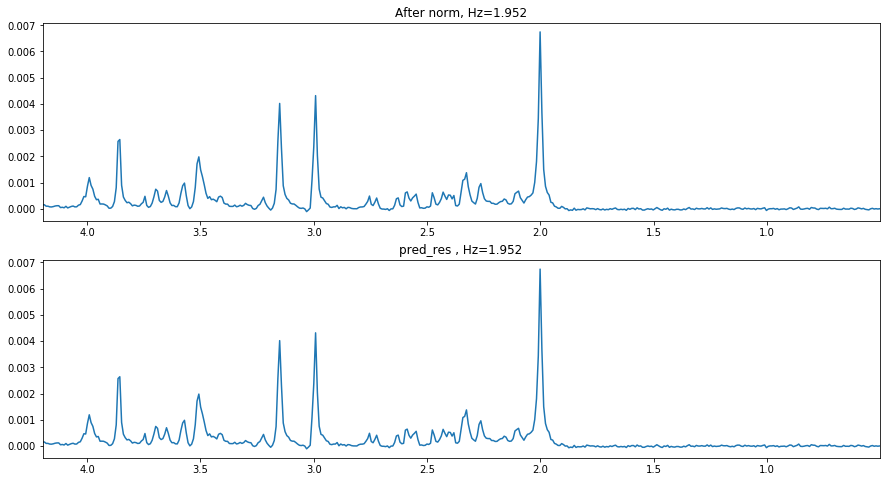

In [260]:
#measure NAA basis
#rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))

base_basis_set = rd['data']

# try multiply 10^7
# NSA = 64
NSA_64_ori = ws_NSA_datasets[-1,:]

#pos = np.where((ppm>=0.5) & (ppm<=4.5))
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
NSA_64_ori = NSA_64_ori[pos]


#norm_coefficient_real = 1.99E+02
norm_coefficient_real = w_area / abs_real_NWS_area
norm_coefficient_imag = norm_coefficient_real

print('norm_coefficient_real',norm_coefficient_real)

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

real_f = interpolate.interp1d(x,NSA_64_ori.real,kind="nearest")
imag_f = interpolate.interp1d(x,NSA_64_ori.imag,kind="nearest")
interpo_NSA_64_ori = real_f(interpo_x) + 1j*(imag_f(interpo_x))
#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm ')
plt.plot(interpo_x,interpo_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

norm_NSA_64_ori = ((interpo_NSA_64_ori.real) * norm_coefficient_real) + 1j*((interpo_NSA_64_ori.imag) * norm_coefficient_imag)
norm_NSA_64_ori = np.expand_dims(norm_NSA_64_ori, axis = 1)

plt.subplot(212)
plt.title('After norm')
plt.plot(interpo_x,norm_NSA_64_ori)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)
compare_NSA64_norm = np.append(interpo_NSA_64_ori.real, norm_NSA_64_ori.real,axis = 1)

X_input = np.expand_dims(compare_NSA64_norm.T,axis = 2)#NSA data

#pred_res = model.predict(X_input, verbose=0)
print('X_input shape',X_input.shape)
pred_res = X_input[:,:,0]

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    
# Solve matrix problem to quantification
#NORM_PRED = pred_res[1]
#print('NORM_PRED',NORM_PRED.shape)
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(denoise_basis_set.real)
print('add_metabo_index')
print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 
pd.set_option('display.max_columns', None)

pinv_b = np.linalg.pinv(base_basis_set.real)

#for LCM basis
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tCr' = [16]/[14]
    C = np.append(C, C[16]/C[14])
    #'mI/tCr' = [10]/[14]
    C = np.append(C, C[10]/C[14])    
    #'tCho/tCr' = [15]/[14]
    C = np.append(C, C[15]/C[14])
    #'tNAA/tCr' = [13]/[14]
    C = np.append(C, C[13]/C[14])
    #'tCr/tCr' = [14]/[14]
    C = np.append(C, C[14]/C[14])    
    #C_set[i] = C/C[2]
    C_set[i] = C

'''
#For gamma basis
#[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'PCr'], [4, 'GABA'], [5, 'Glc'], [6, 'Gln'], 
#[7, 'Glu'], [8, 'GPC'], [9, 'PCh'], [10, 'mI'], [11, 'Lac'], [12, 'NAA'], [13, 'NAAG'], 
#[14, 'tNAA'], [15, 'tCr'], [16, 'tCho'], [17, 'Glx'], [18, 'Glx/tCr'], [19, 'mI/tCr'], 
#[20, 'tCho/tCr'], [21, 'tNAA/tCr'], [22, 'tCr/tCr']]


for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [12] + [13]
    C = np.append(C, C[12]+C[13])
    #tCr = Cr + PCr, [2]+[3]
    C = np.append(C, C[2]+C[3])
    #tCho = PC + GPC, [8]+[9]
    C = np.append(C, C[8]+ C[9])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[6]+C[7])
    #'Glx/tCr' = [17]/[15]
    C = np.append(C, C[17]/C[15])
    #'mI/tCr' = [10]/[15]
    C = np.append(C, C[10]/C[15])    
    #'tCho/tCr' = [16]/[15]
    C = np.append(C, C[16]/C[15])
    #'tNAA/tCr' = [14]/[15]
    C = np.append(C, C[14]/C[15])
    #'tCr/tCr' = [15]/[15]
    C = np.append(C, C[15]/C[15])    
    C_set[i] = C
'''

print('##############Directly subtraction##############')
#print(C_set.T.iloc[0] - C_set.T.iloc[1])
#print('##############Subtraction percentage##############')
#print(C_set.T)
#print(C_set.T.describe())

real_conc = C_set[1]

print('real_conc')
print(real_conc.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])

print('/Cr')
print(real_conc.loc[["tNAA/tCr", "tCr/tCr","tCho/tCr","mI/tCr","Glx/tCr"]])
#cr_ratio = real_conc/real_conc.iloc[2]
#print(cr_ratio.loc[["Cr", "Glu",'Gln','NAA','NAAG',"mI","tNAA","tCho","Glx"]])
'''
The metabolite conc. in phantom report in literature are
NAA: 12.5 mM
Cr: 10 mM
Cho: 3 mM
mI: 7.5 mM
Glu: 12.5 mM

/Cr
NAA: 1.25
Cr: 1
Cho: 0.3
mI: 0.75
Glu: 1.25

'''

## To LCM for quantification

NORM_PRED (774,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 1089
NORM_PRED_new[0] (45679290+13513068j)
len(pad_NORM_PRED) 2048


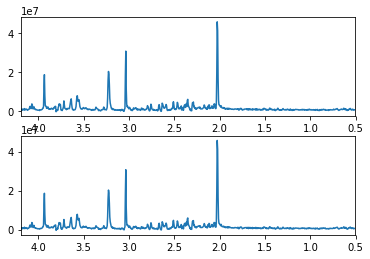

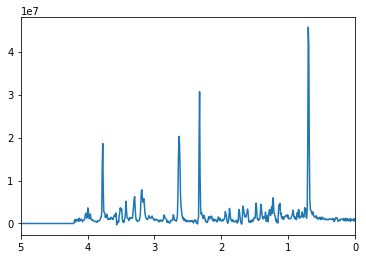

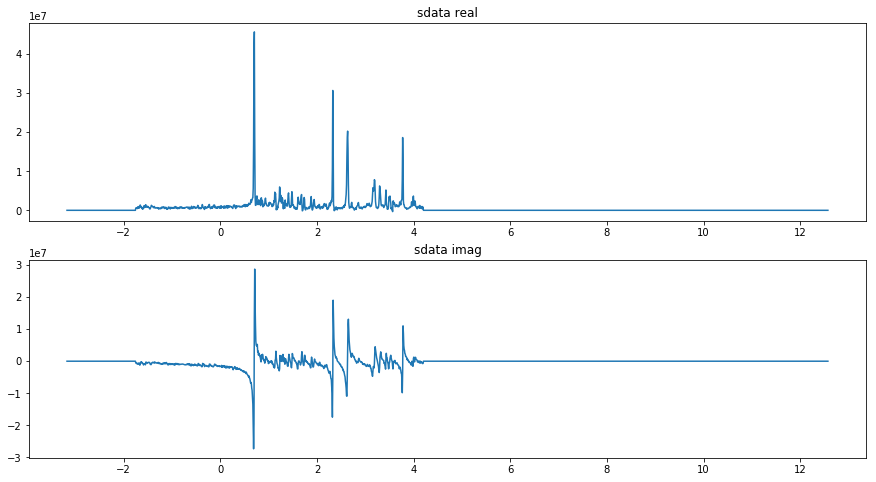

In [41]:
# Case a: 837 xinput 內插回520, 再塞回2048

# Case E: model predict 837,add X_input image, 內插回520,再塞回2048
# Case E-1: model predict 837*2, reshape, 內插回520(real imag 分別內插),再塞回2048
##############################################
#print('norm_coefficient',norm_coefficient)
# NORM_PREDICT
ppm = interpo_x
ppm_cord_max = ppm.max()

NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)

plt.figure()
plt.subplot(211)
plt.plot(ppm,NORM_PRED)
plt.xlim(ppm.max(),ppm.min())

# 相除
#NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

x = interpo_x

xnew=np.linspace(interpo_x[0],interpo_x[-1],520)
#xnew=np.linspace(interpo_x[0],interpo_x[-1],774)
#NORM_PRED
f_real = interpolate.interp1d(x,NORM_PRED.real,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]
f_imag = interpolate.interp1d(x,NORM_PRED.imag,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]

# ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
NORM_PRED_new = f_real(xnew) + 1j*(f_imag(xnew))

plt.subplot(212)
plt.plot(xnew,NORM_PRED_new)
plt.xlim(xnew.max(),xnew.min())

from scipy.io import loadmat
working_dir = os.getcwd()
phantom_path = os.path.join(working_dir,'phantom')
origin_ws_path = os.path.join(working_dir,'phantom','snr_01','ws')
pad_NORM_PRED = loadmat(os.path.join(origin_ws_path,'meas_svs.mat'))
pad_NORM_PRED = pad_NORM_PRED['sdata'][:,0]
pad_NORM_PRED = np.zeros([2048,],dtype=np.csingle)

##############################################


#####################ppm config#####################
sample_point = 2048
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse
#####################ppm config#####################

pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('NORM_PRED_new[0]',NORM_PRED_new.max())

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(NORM_PRED_new)] = NORM_PRED_new

#plt.figure(figsize=(15,10))
plt.figure()
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',len(pad_NORM_PRED))

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'try_norm_pred_lcm')


plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('sdata real')
plt.plot(ppm,pad_NORM_PRED.real)
plt.subplot(212)
plt.title('sdata imag')
plt.plot(ppm,pad_NORM_PRED.imag)


#plt.figure(figsize=(15,8))
#plt.title('transform from tdata')
#plt.plot(ppm,np.fft.fft(pad_NORM_PRED_tdata[:,0]))
#plt.xlim(4.4,0.4)


import scipy.io as sio
#sio.savemat(os.path.join(dump_path,'snr_01','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})


In [155]:
#%matplotlib qt
%matplotlib inline

In [95]:
plt.figure(figsize=(10,6))
plt.xlabel('ppm', fontsize=16)
for i in range(len(base_basis_set)):
    print(i, add_metabo_index[i])
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #plt.figure(figsize=(15,4))
    #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
    plt.title('Basis spectrum', fontsize=16)
    if i == 2 or i == 11 or i == 12:
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
    else:
        plt.plot(interpo_x,base_basis_set[i],color='gray')
    #plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'filtered')
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.legend(loc='upper right',prop={'size': 20})

0 Ala


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


1 Asp


No handles with labels found to put in legend.


2 Cr
3 GABA
4 Glc
5 Gln
6 Glu
7 GPC
8 PCh
9 Lac
10 mI
11 NAA
12 NAAG


## Different TR data

files ['nws_TR800.npz', 'nws_TR1200.npz', 'nws_TR2000.npz', 'nws_TR4000.npz', 'ws_TR800.npz', 'ws_TR1200.npz', 'ws_TR2000.npz', 'ws_TR4000.npz']


HBox(children=(IntProgress(value=0, max=8), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



ws_TR_datasets (4, 1024)
nws_TR_datasets (4, 1024)


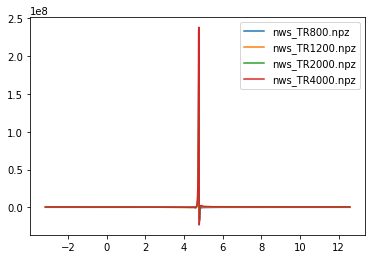

In [12]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_TR_to_model')

ws_TR_datasets = np.zeros((4,1024,),dtype=np.csingle)
nws_TR_datasets = np.zeros((4,1024,),dtype=np.csingle)

files = [ f for f in sorted(os.listdir(phantom_to_model_path), key=lambda x: x[:-7]) if os.path.isfile(os.path.join(phantom_to_model_path,f)) ]
print('files',files)

plt.figure()
for idx, cont in enumerate(tqdm_notebook(files)):
    if (idx < 4 ):
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
        nws_TR_datasets[idx,:] = nws_data
        plt.plot(ppm, nws_data, label=files[idx])
        plt.legend(loc='upper right')
    else:
        read_data= np.load(os.path.join(phantom_to_model_path, cont))
        ppm = read_data['ppm']
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_TR_datasets[idx-4,:] = ws_read_data
print('ws_TR_datasets',ws_TR_datasets.shape)
print('nws_TR_datasets',nws_TR_datasets.shape)

len_1024_ppm_0_5_4_5 260


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


norm_coefficient_real 311.9608659716804
norm_coefficient_imag 311.9608659716804
compare_norm_interpo_ws_tr800 (837, 2)
X_input.shape! (2, 837, 1, 1)
X_input.shape!! (2, 837, 1, 2)
pred_res.shape! (2, 1674)
pred_res.shape!! (2, 837)
0
X_input (2, 837, 1)
1
X_input (2, 837, 1)
NORM_PRED (837,)
add_metabo_index ['Ala', 'Asp', 'Cr', 'GABA', 'Glc', 'Gln', 'Glu', 'GPC', 'PCh', 'Lac', 'mI', 'NAA', 'NAAG', 'tNAA', 'tCr', 'tCho', 'Glx', 'Glx/tNAA', 'mI/tNAA', 'tCho/tNAA', 'tCr/tNAA']
        Ala       Asp        Cr      GABA       Glc       Gln        Glu  \
0  0.097123  0.325623  1.539797  0.325623  0.325623  0.976870   1.978570   
1  0.779641  1.976995  9.567946  1.976995  1.976995  5.930987  12.085796   

        GPC       PCh       Lac        mI        NAA      NAAG       tNAA  \
0  0.212473  0.488435  0.094922  1.352155   2.541498  0.237304   2.778802   
1  1.436144  2.965494  0.663987  8.355627  15.722761  1.659968  17.382729   

        tCr      tCho        Glx  Glx/tNAA   mI/tNAA  tCho/

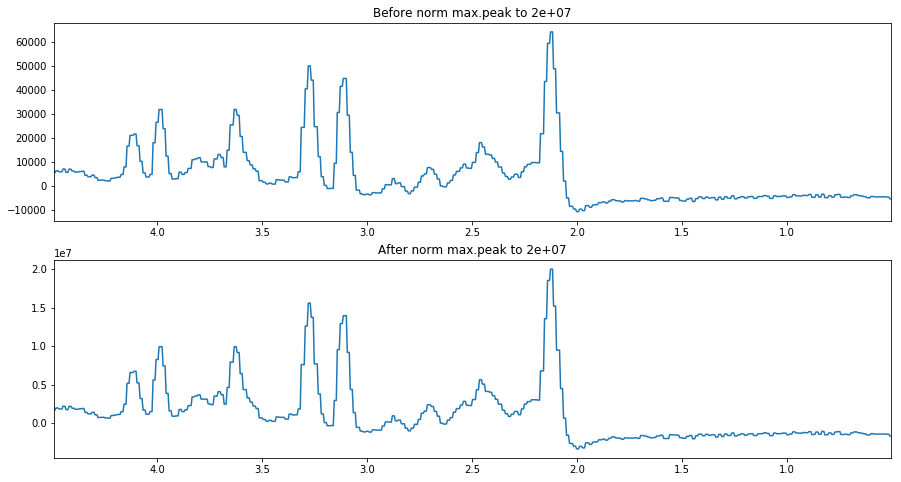

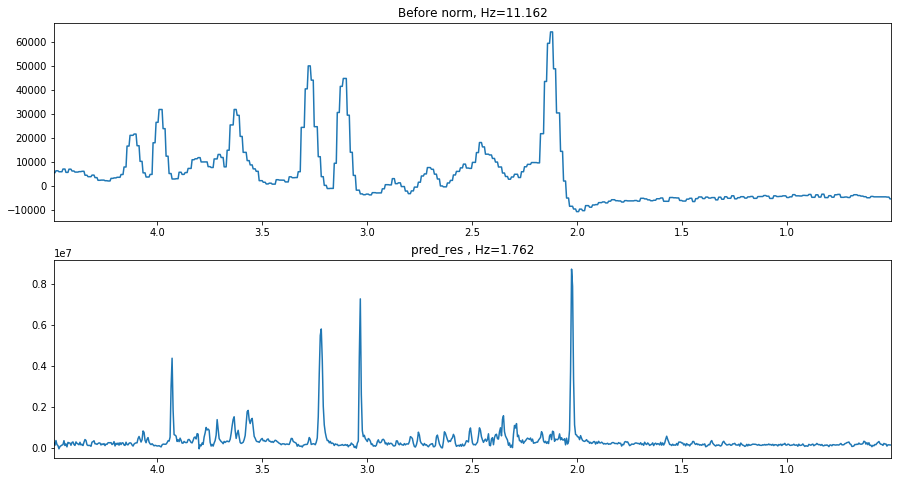

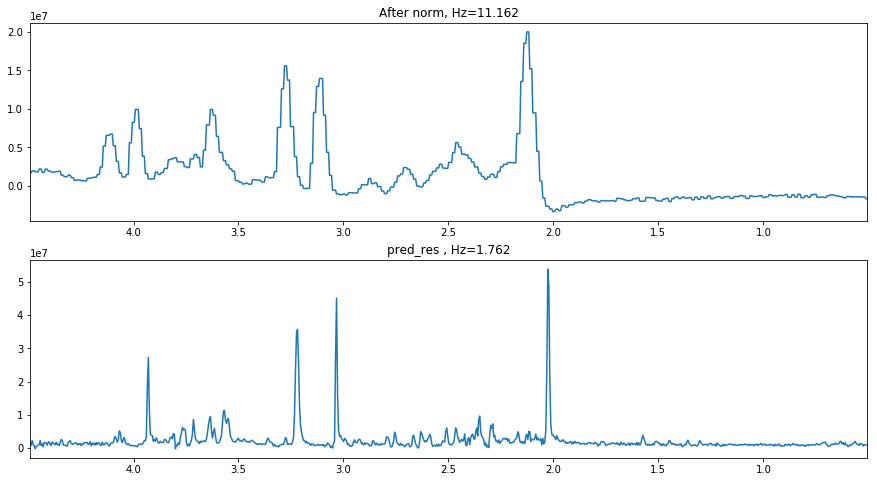

In [36]:
#measure NAA basis
rd = np.load(os.path.join(working_dir,'base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(phantom_to_model_path, 'nws_TR800.npz'))
ppm = read_data['ppm']
ws_tr800 = ws_TR_datasets[3,:]
#ws_tr800 = ws_tr800.real*(-1) +1j*(ws_tr800.imag)*(-1)

pos = np.where((ppm>=0.5) & (ppm<=4.5))
crop_ppm = ppm[pos]
len_1024_ppm_0_5_4_5 = len(crop_ppm)
print('len_1024_ppm_0_5_4_5',len_1024_ppm_0_5_4_5)

ws_tr800 = ws_tr800[pos]

#############interpolation
import scipy as scipy
from scipy import interpolate

x = crop_ppm
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)

real_f = interpolate.interp1d(x,ws_tr800.real,kind="nearest")
imag_f = interpolate.interp1d(x,ws_tr800.imag,kind="nearest")
interpo_ws_tr800 = real_f(interpo_x) + 1j*(imag_f(interpo_x))

#############interpolation

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Before norm max.peak to 2e+07')
plt.plot(interpo_x,interpo_ws_tr800)
plt.xlim(interpo_x.max(),interpo_x.min())


norm_coefficient_real = 2e+07 / interpo_ws_tr800.real.max()
norm_coefficient_imag = 2e+07 / interpo_ws_tr800.real.max()

print('norm_coefficient_real',norm_coefficient_real)
print('norm_coefficient_imag',norm_coefficient_imag)

norm_interpo_ws_tr800 = ((interpo_ws_tr800.real) * norm_coefficient_real) + 1j*((interpo_ws_tr800.imag) * norm_coefficient_imag)
norm_interpo_ws_tr800 = np.expand_dims(norm_interpo_ws_tr800, axis = 1)
#norm_NSA_64_ori = np.expand_dims(interpo_NSA_64_ori, axis = 1)


plt.subplot(212)
plt.title('After norm max.peak to 2e+07')
plt.plot(interpo_x,norm_interpo_ws_tr800)
plt.xlim(interpo_x.max(),interpo_x.min())

###############################################################################
interpo_ws_tr800 = np.expand_dims(interpo_ws_tr800, axis = 1)

compare_norm_interpo_ws_tr800 = np.append(interpo_ws_tr800, norm_interpo_ws_tr800,axis = 1)
print('compare_norm_interpo_ws_tr800',compare_norm_interpo_ws_tr800.shape)#compare_NSA64_norm (837, 2)

X_input = np.expand_dims(compare_norm_interpo_ws_tr800.T,axis = 2)#NSA data
X_input = np.expand_dims(X_input,axis = 3)
print('X_input.shape!',X_input.shape)#X_input.shape (2, 837, 1, 1)
X_input = np.append(X_input.real, X_input.imag, axis = 3)
#X_train: (45000, 837, 1, 2)
print('X_input.shape!!',X_input.shape)#X_input.shape (2, 837, 1, 1)

pred_res = model.predict(X_input, verbose=0)
print('pred_res.shape!',pred_res.shape)
pred_res = pred_res[:,:837] + 1j*(pred_res[:,837:])
print('pred_res.shape!!',pred_res.shape)#(2, 837)

X_input = X_input[:,:,:,0] + 1j*(X_input[:,:,:,1])

input_name = ['Before norm', 'After norm']

# Visualize the predicton result
for num in range(len(X_input)):
    plt.figure(figsize=(15,8))
    print(num)
    plt.subplot(211)
    plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
    print('X_input',X_input.shape)
    plt.plot(interpo_x,X_input[num])
    plt.xlim(interpo_x.max(),interpo_x.min())
    plt.subplot(212)
    #print(pred_res[num].shape)
    plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
    plt.plot(interpo_x,pred_res[num])
    plt.xlim(interpo_x.max(),interpo_x.min())


# Solve matrix problem to quantification
NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)
NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)


brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])
C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
pinv_b = np.linalg.pinv(base_basis_set.real)
print('add_metabo_index',add_metabo_index)
pd.set_option('display.max_columns', None)
for i in (range(len(pred_res))):
    C = np.matmul(pred_res[i].real, pinv_b)
    #tNAA = NAA + NAAG, [11] + [12]
    C = np.append(C, C[11]+C[12])
    #tCr = Cr + PCr, [2]+[NA]
    C = np.append(C, C[2])
    #tCho = PC + GPC, [8]+[7]
    C = np.append(C, C[8]+C[7])
    #Glx = (Gln + Glu), [5]+[6]
    C = np.append(C, C[5]+C[6])
    #'Glx/tNAA' = [16]/[13]
    C = np.append(C, C[16]/C[13])
    #'mI/tNAA' = [10]/[13]
    C = np.append(C, C[10]/C[13])    
    #'tCho/tNAA' = [15]/[13]
    C = np.append(C, C[15]/C[13])
    #'tCr/tNAA' = [14]/[13]
    C = np.append(C, C[14]/C[13])    
    C_set[i] = C
print(C_set.T)
#print(C_set.T.describe())

## To LCM for quantification

NORM_PRED (837,)


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


pad_ppm_idx 525
NORM_PRED_new[0] (84317.53-63399.21j)
len(pad_NORM_PRED) 1024


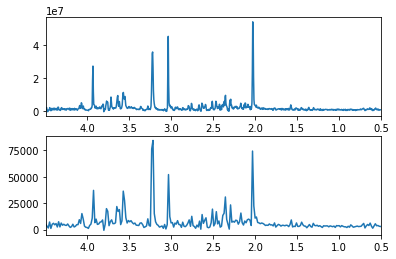

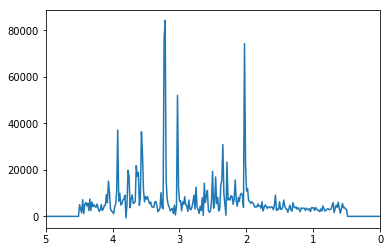

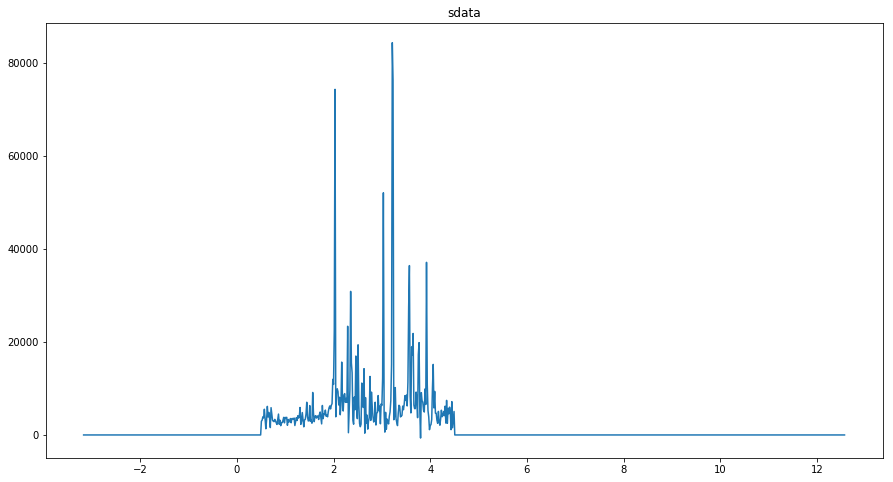

In [37]:
# Case E: model predict 837,add X_input image, 內插回520,再塞回2048
# Case E-1: model predict 837*2, reshape, 內插回520(real imag 分別內插),再塞回2048
##############################################
#print('norm_coefficient',norm_coefficient)
# NORM_PREDICT
ppm = interpo_x
ppm_cord_max = ppm.max()

NORM_PRED = pred_res[1]
print('NORM_PRED',NORM_PRED.shape)

plt.figure()
plt.subplot(211)
plt.plot(ppm,NORM_PRED)
plt.xlim(ppm.max(),ppm.min())

# 相除

NORM_PRED = (NORM_PRED.real/norm_coefficient_real) +1j*(NORM_PRED.imag/norm_coefficient_imag)

x = interpo_x
xnew=np.linspace(interpo_x[0],interpo_x[-1],len_1024_ppm_0_5_4_5)#len_1024_ppm_0_5_4_5 = 260
#NORM_PRED
f_real = interpolate.interp1d(x,NORM_PRED.real,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]
f_imag = interpolate.interp1d(x,NORM_PRED.imag,kind="nearest")#["nearest","zero","slinear","quadratic","cubic"]

# ‘slinear’, ‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
NORM_PRED_new = f_real(xnew) + 1j*(f_imag(xnew))

plt.subplot(212)
plt.plot(xnew,NORM_PRED_new)
plt.xlim(xnew.max(),xnew.min())

pad_NORM_PRED = np.zeros([1024,],dtype=np.csingle)

##############################################


#####################ppm config#####################
sample_point = 1024
BW = 2000#Hz
B = 127#3T = 3*42.58= 127MHz
ppm_length = BW/B#16.xx ppm
ppm_center = 4.7
min_bound = ppm_center - (ppm_length)/2
max_bound = ppm_center + (ppm_length)/2
ppm = np.linspace(min_bound, max_bound, sample_point)
ppm = ppm[::-1]#reverse

#read_data= np.load(os.path.join(phantom_to_model_path, 'nws_TR800.npz'))
#ppm = read_data['ppm']

#####################ppm config#####################

pad_ppm_idx = abs(ppm - ppm_cord_max).argmin()
print('pad_ppm_idx',pad_ppm_idx)

print('NORM_PRED_new[0]',NORM_PRED_new.max())

pad_NORM_PRED[pad_ppm_idx:pad_ppm_idx+len(NORM_PRED_new)] = NORM_PRED_new

#plt.figure(figsize=(15,10))
plt.figure()
plt.plot
plt.plot(ppm,pad_NORM_PRED)
plt.xlim(5,0)
#print('ppm[0]-ppm[1]',ppm[0]-ppm[1])
print('len(pad_NORM_PRED)',len(pad_NORM_PRED))

# SAVE TO MAT
working_dir = os.getcwd()
dump_path = os.path.join(working_dir, 'TR_try_norm_pred_lcm')


pad_NORM_PRED_tdata = np.fft.ifft(pad_NORM_PRED)
pad_NORM_PRED_tdata = np.expand_dims(pad_NORM_PRED_tdata, axis=1)#(2048, 1)
pad_NORM_PRED = np.expand_dims(pad_NORM_PRED, axis=1)#(2048, 1)

plt.figure(figsize=(15,8))
plt.title('sdata')
plt.plot(ppm,pad_NORM_PRED)
#plt.ylim(-5000,pad_NORM_PRED.max())
#plt.xlim(4.4,0.4)

import scipy.io as sio
#sio.savemat(os.path.join(dump_path,'TR800','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
#sio.savemat(os.path.join(dump_path,'TR1200','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
#sio.savemat(os.path.join(dump_path,'TR2000','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})
sio.savemat(os.path.join(dump_path,'TR4000','ws','meas_svs.mat'), {'sdata':pad_NORM_PRED})

## Curve fitting 算面積

# In Vivo data: GongYJ: DLPFC, M1, 

In [7]:
def measure_width_hz(ppm, spectrum_data):
    if (spectrum_data.ndim == 2):
        spectrum_data = spectrum_data[:,0]
    tNAA_pos = np.where((ppm>=1.8) & (ppm<=2.2))
    tNAA_crop = spectrum_data[tNAA_pos]
    #tNAA_FWHM_val = max(tNAA_crop)*0.2
    tNAA_FWHM_val = max(tNAA_crop)*(1-0.707)
    tNAA_FWHM = np.where(tNAA_crop > tNAA_FWHM_val)
    tNAA_FWHM_width_ppm = max(ppm[tNAA_pos][tNAA_FWHM])-min(ppm[tNAA_pos][tNAA_FWHM])
    #ppm to Hz, (BW)/(total ppm = BW/B) * width_ppm = B*width_ppm
    tNAA_FWHM_width_hz = round(123.177*tNAA_FWHM_width_ppm, 3)
    return tNAA_FWHM_width_hz

def freq_shift_corr(ppm, spectrum_data):
    #print('spectrum_data.shape',spectrum_data.shape)
    tNAA_pos = np.where((ppm>=1.5) & (ppm<=2.5))
    NAA_peak_pos = np.array(np.where((spectrum_data == max(spectrum_data[tNAA_pos]))))[0]
    if len(NAA_peak_pos) > 1:
        NAA_peak_pos = int(NAA_peak_pos[0])
    ppm_2 = (np.abs(ppm - 2.0)).argmin()#The number was the cloest one to 2 ppm
    diff = NAA_peak_pos - ppm_2
    shift_point = NAA_peak_pos - ppm_2
    shift_correction = np.roll(spectrum_data,-shift_point)
    return shift_correction

def cal_area(ppm, spectrum):
    spectrum_max = spectrum.real.max()
    area_threadshold = spectrum_max*(1-0.99)
    area_pos_range = np.where(spectrum >= area_threadshold)
    area_pos_range_byppm = np.where((ppm >= 4) & (ppm <= 5))
    #print('Points in Area:',len(area_pos_range_byppm[0]))
    area_range = spectrum[area_pos_range]
    area = round(np.sum(area_range).real*abs(ppm[0]-ppm[1]), 5)#print('Area by threadshold = %E' %area)
    area_byppm = round(np.sum(spectrum[area_pos_range_byppm].real)*abs(ppm[0]-ppm[1]), 5)
    abs_area = round(np.sum(abs(area_range.real))*abs(ppm[0]-ppm[1]), 5)#Area by threadshold_ABS
    total_area = round(np.sum(spectrum).real*abs(ppm[0]-ppm[1]), 5)#All spectrum area
    total_area_abs = round(np.sum(abs(spectrum.real))*abs(ppm[0]-ppm[1]), 5)#All spectrum area ABS
    #print('ppm_gap', ppm[0]-ppm[1])
    #print('Spectrum area byppm = %E' %area_byppm)
    #plt.figure(figsize=(15,8))
    #plt.plot(211)
    #plt.title('NWS Spectrum', size = 18)
    #plt.title('Spectrum area byppm = %E' %area_byppm)
    #plt.plot(ppm,spectrum,color='gray')
    #plt.plot(ppm[area_pos_range_byppm],spectrum[area_pos_range_byppm],color='r', label='Calcuated Area')
    #plt.legend(loc='upper right')
    #plt.xlim(5.1,3.9)
    #plt.xlabel('PPM',size=12)
    #plt.ylabel('Magnitude', size=15)    
    return area_byppm

def measure_peak_phase(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    return corr_spectrum[origin_peak_pos].imag

def measure_peak_area(ppm,nws_data, corr_spectrum):
    before_corr = nws_data
    origin_peak_pos = np.argmax(before_corr.real)
    origin_peak_range = np.where((ppm >= 4) & (ppm <= 5))
    area = np.sum(corr_spectrum[origin_peak_range].real)*abs(ppm[0]-ppm[1])
    return area

###########################Zero-phase correction###########################
def zero_phase_corr(nws_data):    
    FT_M = np.abs(nws_data)
    FT_P = np.angle(nws_data, deg=True)
    var_phi_range = np.arange(-180, 180)
    phase_val = np.zeros([len(var_phi_range)])
    area_val = np.zeros([len(var_phi_range)])

    ######Find phase min######
    for idx, var_phi in enumerate(var_phi_range):
        angle = var_phi
        new_phase = FT_P + angle
        new_spectrum = nws_data * 0
        new_theada = new_phase * (np.pi / 180)
        new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
        phase_val[idx] = abs(measure_peak_phase(ppm,nws_data, new_spectrum))
        area_val[idx] = measure_peak_area(ppm,nws_data, new_spectrum)
    #angle = var_phi_range[np.argmin(abs(phase_val))]
    #print('(phase_val)',(phase_val).min())
    angle = var_phi_range[np.argmax(area_val)]

    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    #print('angle',angle)

    new_spectrum = nws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum
###########################Zero-phase correction###########################
def ws_phase_corr(ws_data, angle):
    #print('angle',angle)    
    FT_M = np.abs(ws_data)
    FT_P = np.angle(ws_data, deg=True)
    new_phase = FT_P + angle#FT_P = 52.96096145 角度
    new_theada = new_phase * (np.pi / 180)#iF angle = 0, new theada = 0.9 ..... 逕度 為了要丟下面的cos?
    new_spectrum = ws_data * 0
    new_spectrum = np.multiply(FT_M , np.cos(new_theada)) + 1j*np.multiply(FT_M , np.sin(new_theada))
    return new_spectrum

## Read .npz data

files ['nws_DLPFC1.npz', 'nws_DLPFC2.npz', 'nws_DLPFC3.npz', 'nws_DLPFC4.npz', 'nws_DLPFC5.npz', 'ws_DLPFC1.npz', 'ws_DLPFC2.npz', 'ws_DLPFC3.npz', 'ws_DLPFC4.npz', 'ws_DLPFC5.npz']


HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "



ws_datasets (5, 2048)
nws_datasets (5, 2048)
[[0, 'Ala'], [1, 'Asp'], [2, 'Cr'], [3, 'GABA'], [4, 'Glc'], [5, 'Gln'], [6, 'Glu'], [7, 'GPC'], [8, 'PCh'], [9, 'Lac'], [10, 'mI'], [11, 'NAA'], [12, 'NAAG'], [13, 'tNAA'], [14, 'tCr'], [15, 'tCho'], [16, 'Glx'], [17, 'Glx/tCr'], [18, 'mI/tCr'], [19, 'tCho/tCr'], [20, 'tNAA/tCr'], [21, 'tCr/tCr']]
naa_cord len 63
interpo_x[0]-interpo_x[1] 0.004780193509247077


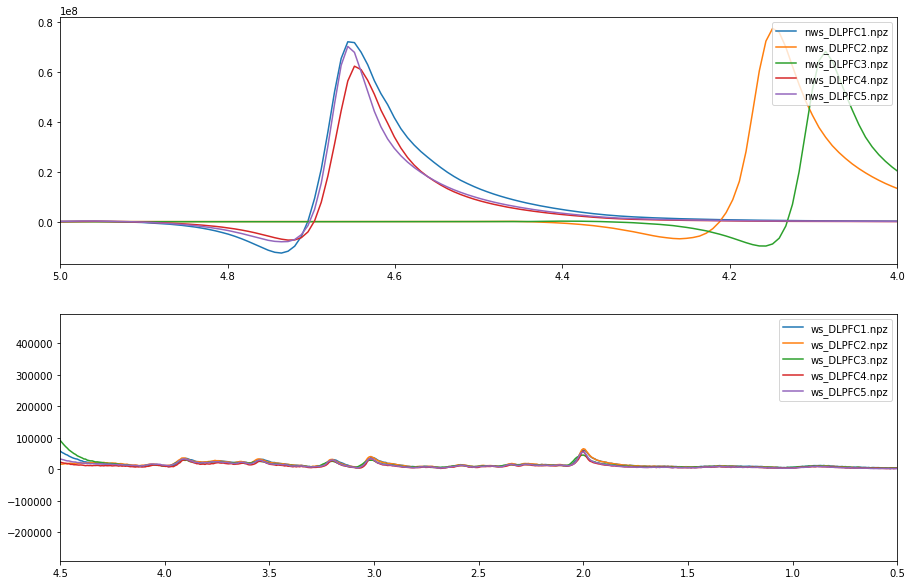

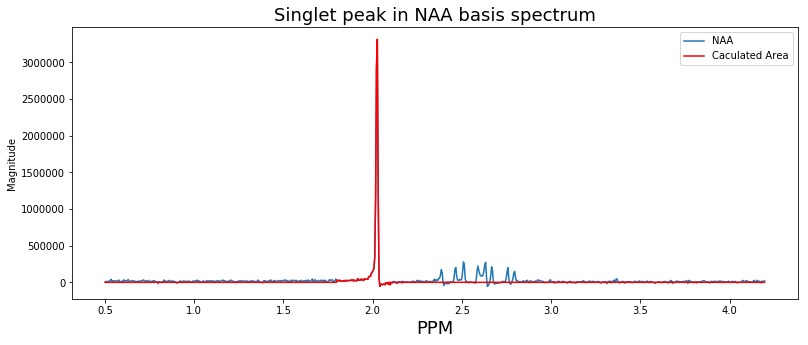

In [23]:
import time
from tqdm import tnrange, tqdm_notebook
import pandas as pd

working_dir = os.getcwd()
phantom_to_model_path = os.path.join(working_dir, 'phantom_TR_to_model')
invivo_to_model_path = os.path.join(working_dir, 'invivo_to_model')
#subject_path = os.path.join(invivo_to_model_path, 'GongYJ')
subject_path = os.path.join(invivo_to_model_path, 'PengBY')
region_path = os.path.join(subject_path, 'DLPFC')
#region_path = os.path.join(subject_path, 'M1')
#region_path = os.path.join(subject_path, 'VC')

ws_datasets = np.zeros((5,2048,),dtype=np.csingle)
nws_datasets = np.zeros((5,2048,),dtype=np.csingle)

#files = [ f for f in sorted(os.listdir(DLPFC_path), key=lambda x: x[5]) if os.path.isfile(os.path.join(DLPFC_path,f)) ]
files = [ f for f in sorted(os.listdir(region_path), key=lambda x: x[0]) if os.path.isfile(os.path.join(region_path,f)) ]
print('files',files)


plt.figure(figsize=(15,10))
for idx, cont in enumerate(tqdm_notebook(files)):
    if (idx < 5 ):
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        nws_data = read_data['X']
        if nws_data.ndim == 2:
            nws_data = nws_data[:,0]
        nws_datasets[idx,:] = nws_data
        plt.subplot(211)
        plt.plot(ppm, nws_data, label=files[idx])
        plt.xlim(5,4)
        plt.legend(loc='upper right')
    else:
        read_data= np.load(os.path.join(region_path, cont))
        ppm = read_data['ppm']
        ws_read_data = read_data['X']
        if ws_read_data.ndim == 2:
            ws_read_data = ws_read_data[:,0]
        ws_datasets[idx-5,:] = ws_read_data
        plt.subplot(212)
        plt.plot(ppm, ws_read_data, label=files[idx])
        plt.xlim(4.5,0.5)
        #plt.ylim(-1000,50000)
        plt.legend(loc='upper right')
        
print('ws_datasets',ws_datasets.shape)
print('nws_datasets',nws_datasets.shape)

##########################################Basis filter#########################################
#################To get NAA singlet 2.0 ppm Peak 1 mole Area#################
rd = np.load(os.path.join(working_dir,'42ppm_base_basis_set.npz'))
#rd = np.load(os.path.join(working_dir,'gamma_42ppm_base_basis_set.npz'))
base_basis_set = rd['data']

read_data= np.load(os.path.join(region_path, files[0]))
ppm = read_data['ppm']
pos = np.where((ppm>=0.5) & (ppm<=4.2))
crop_ppm = ppm[pos]
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],837)
interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
#interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

brain_metabo_index =  brain_conc_set[0].index
add_metabo_index = brain_metabo_index[:-2]
add_metabo_index = list(add_metabo_index)
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tNAA','mI/tNAA','tCho/tNAA','tCr/tNAA'])
#add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tCr/tCr'])
add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))]) 

denoise_basis_set = base_basis_set*0
#plt.figure(figsize = (15,10))
for i in range(len(base_basis_set)):
    thd = np.quantile(base_basis_set[i].real, .90)
    denoise_basis_set[i]  = base_basis_set[i]
    #denoise_basis_set[i][denoise_basis_set[i] < thd] = 0
    #LCModel basis
    if i ==11:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
    '''
    #gamma basis
    if i ==12:#11 = NAA
        denoise_basis_set[i] = denoise_basis_set[i]*0
        naa_cord = np.where((interpo_x>1.8)&(interpo_x<2.1))
        denoise_basis_set[i][naa_cord] = base_basis_set[i][naa_cord]
        naa_area = np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])
        w_area = naa_area *55556 * (2/3)
        print('naa_cord len',len(naa_cord[0]))
        print('interpo_x[0]-interpo_x[1]',interpo_x[0]-interpo_x[1])
        #print('w_area (naa_area *55556 * (2/3)) =', w_area)
    '''    
    ##########Visualize spectra##########
    if i == 11:#lcmbasis
    #if i == 12:#gamma basis
        plt.figure(figsize=(13,5))
        #plt.subplot(211)
        cal_area(ppm, abs(new_spectrum.real))
        #plt.subplot(212)
        #plt.title('Original and filtered, area = %E' %(np.sum(denoise_basis_set[i].real)*(interpo_x[0]-interpo_x[1])))
        #plt.title('Calculate the singlet area in basis for simulated water signal')
        plt.title('Singlet peak in NAA basis spectrum',size=18)
        plt.plot(interpo_x,base_basis_set[i],label = add_metabo_index[i])
        plt.plot(interpo_x, denoise_basis_set[i], color='r',label = 'Caculated Area')
        #plt.xlim(interpo_x.max(),interpo_x.min())
        #plt.xlim(2.3,1.8)
        #plt.xlim(4.2,0.5)
        plt.xlabel('PPM',size=18)
        plt.ylabel('Magnitude')
        plt.legend(loc='upper right')
##########################################Basis filter#########################################

## 選擇頻譜

w_area: 1883176724.3662596, abs_real_NWS_area: 10340659.41551


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


w_area: 1883176724.3662596, abs_real_NWS_area: 9567197.80866


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


w_area: 1883176724.3662596, abs_real_NWS_area: 7580591.28648
w_area: 1883176724.3662596, abs_real_NWS_area: 7654859.47878
w_area: 1883176724.3662596, abs_real_NWS_area: 8295728.20379
#####real_conc#####
lazy
                      0             1             2             3             4
Metabo                                                                         
Cr         1.015693e+01  1.135566e+01  1.120129e+01  1.008266e+01  1.011066e+01
Glu        8.146445e+00  9.413119e+00  8.513335e+00  7.992515e+00  8.166725e+00
Gln        5.493651e+00  6.576966e+00  7.347520e+00  5.071505e+00  5.608119e+00
GPC        1.799644e+00  1.536946e+00  1.732164e+00  1.622811e+00  1.645333e+00
PCh        7.426581e-01  9.909870e-01  1.383277e+00  8.368295e-01  9.936842e-01
mI         7.228487e+00  9.061938e+00  7.949286e+00  7.629567e+00  8.857432e+00
NAA        1.902723e+01  2.076031e+01  2.019599e+01  1.742022e+01  1.761614e+01
NAAG       1.031060e+00  8.696303e-01  7.757320e-01  1.780806e-01  2.276

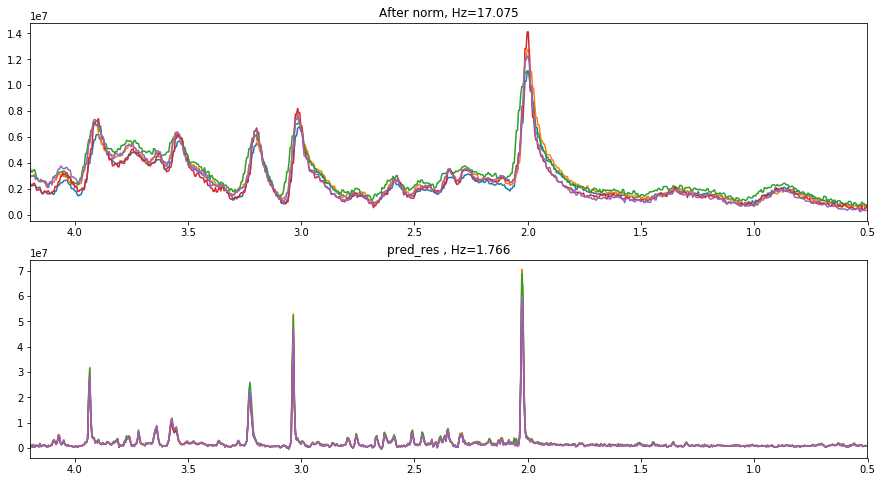

In [24]:
#measure NAA basis
#print ([list((i, add_metabo_index[i])) for i in range(len(add_metabo_index))])

#print('files',files)
plt.figure(figsize=(15,8))
for cur_sel_id in range(5):
    #cur_sel_id = 2
    ws_data = ws_datasets[cur_sel_id,:]
    nws_data = nws_datasets[cur_sel_id,:]
    
    '''
    large_42ppm = np.where(ppm>4.2)
    print(large_42ppm)
    fillinval = np.ones([len(large_42ppm)])*ws_data[large_42ppm[0]][-1]
    print(fillinval)
    ws_data[large_42ppm] = fillinval
    '''
    #print('ppm',len(ppm))
    #print('nws_data',len(nws_data))

    ########################算NWS 面積囉######################
    new_spectrum = zero_phase_corr(nws_data)
    abs_real_NWS_area = cal_area(ppm, abs(new_spectrum.real))
    ########################得NWS 面積########################
    
    ########################對WS修正相位囉######################
    #corr_angle = (np.angle(new_spectrum, deg=True) - np.angle(nws_data, deg=True))
    corr_angle = 0
    ws_data = ws_phase_corr(ws_data, corr_angle)    
    ########################得NWS 面積########################    


    #norm_coefficient_real = 1.99E+02
    norm_coefficient_real = w_area / abs_real_NWS_area
    #norm_coefficient_real = w_area / (abs_real_NWS_area*2)
    print(f'w_area: {w_area}, abs_real_NWS_area: {abs_real_NWS_area}')
    norm_coefficient_imag = norm_coefficient_real
    #norm_coefficient_real = (w_area / abs_real_NWS_area)*2
    #norm_coefficient_real = 1
    #norm_coefficient_real = np.max(w_area.real)
    #norm_coefficient_imag = np.max(w_area.imag)
    
    #print('norm_coefficient_real',norm_coefficient_real)

    pos = np.where((ppm>=0.5) & (ppm<=4.2))
    crop_ppm = ppm[pos]
    len_2048_ppm_0_5_4_5 = len(crop_ppm)
    ws_data = ws_data[pos]


    ##########################interpolation 給CNN 所以要內插到837##########################
    import scipy as scipy
    from scipy import interpolate

    x = crop_ppm
    interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],774)
    #interpo_x=np.linspace(crop_ppm[0],crop_ppm[-1],467)

    real_f = interpolate.interp1d(x,ws_data.real,kind="nearest")
    imag_f = interpolate.interp1d(x,ws_data.imag,kind="nearest")
    interpo_ws_data = real_f(interpo_x) + 1j*(imag_f(interpo_x))

    ##########################interpolation##########################
    #plt.figure(figsize=(15,8))
    #plt.subplot(211)
    #plt.title('Before norm max.peak to 2e+07')
    #plt.plot(interpo_x,interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
    
    #norm_coefficient_real = np.max(interpo_ws_data.real)*8
    #norm_coefficient_imag = norm_coefficient_real
    
    norm_interpo_ws_data = ((interpo_ws_data.real) * norm_coefficient_real) + 1j*((interpo_ws_data.imag) * norm_coefficient_imag)
    #norm_interpo_ws_data = ((interpo_ws_data.real) / norm_coefficient_real) + 1j*((interpo_ws_data.imag) / norm_coefficient_imag)
    norm_interpo_ws_data = np.expand_dims(norm_interpo_ws_data, axis = 1)

    #plt.subplot(212)
    #plt.title('After norm ')
    #plt.plot(interpo_x,norm_interpo_ws_data)
    #plt.xlim(interpo_x.max(),interpo_x.min())
    ###############################################################################
    interpo_ws_data = np.expand_dims(interpo_ws_data, axis = 1)

    compare_norm_interpo_ws_data = np.append(interpo_ws_data, norm_interpo_ws_data,axis = 1)
    #print('compare_norm_interpo_ws_data',compare_norm_interpo_ws_data.shape)#compare_NSA64_norm (837, 2)

    X_input = np.expand_dims(compare_norm_interpo_ws_data.T,axis = 2)#NSA data
    #print('X_input',X_input.shape)
    #X_input = np.expand_dims(X_input,axis = 3)
    #X_input = np.append(X_input.real, X_input.imag, axis = 3)


    pred_res = model.predict(X_input, verbose=0)

    input_name = ['Before norm', 'After norm']
    # Visualize the predicton result
    for num in range(1,2):
    #for num in range(len(X_input)):
        #plt.figure(figsize=(15,8))
        plt.subplot(211)
        plt.title(f'{input_name[num]}, Hz={measure_width_hz(interpo_x, X_input[num])}')
        plt.plot(interpo_x,X_input[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
        plt.subplot(212)
        #print(pred_res[num].shape)
        plt.title(f'pred_res , Hz={measure_width_hz(interpo_x, pred_res[num])}')
        plt.plot(interpo_x,pred_res[num])
        plt.xlim(interpo_x.max(),interpo_x.min())
    ###################for abtract figure############################################
    '''
    plt.figure(figsize=(15,6))
    plt.subplot(211)
    #plt.plot(interpo_x,X_input[1]*2.3,color='gray',label='Orignal spectrum')
    plt.plot(interpo_x,X_input[1]*2.1,color='k')
    #print(pred_res[num].shape)
    plt.title(f'Subject 2, Dorsal Lateral Prefrontal Cortex (DLPFC)', size = 18)
    #plt.plot(interpo_x,pred_res[1],color ='r',label='CNN prediction')
    
    plt.plot(interpo_x,pred_res[1],color ='r')
    #plt.xlim(interpo_x.max()-0.2,interpo_x.min())
    #plt.yticks([])
    plt.xlim(4.2,0.5)
    plt.xlabel('PPM',size=20)
    #plt.ylabel('Magnitude', size=15)
    plt.legend(loc='upper right')
    #import scipy.io as sio
    #sio.savemat('cnn_predict.mat', {'input':X_input[1], 'output':pred_res[1], 'ppm':interpo_x})
    '''
    ###################for abtract figure############################################
    ######################################定量囉######################################
    # Solve matrix problem to quantification
    brain_metabo_index =  brain_conc_set[0].index
    add_metabo_index = brain_metabo_index[:-2]
    add_metabo_index = list(add_metabo_index)
    add_metabo_index.extend(['tNAA','tCr','tCho','Glx','Glx/tCr','mI/tCr','tCho/tCr','tNAA/tCr','tCr/tCr'])

    C_set = pd.DataFrame(data=np.zeros([len(add_metabo_index),len(pred_res)]), index=add_metabo_index)
    #C_pd = pd.DataFrame(data=np.zeros([len(add_metabo_index),1]), index=add_metabo_index)
    water_area = abs_real_NWS_area
    water_conc = 55556

    pinv_b = np.linalg.pinv(denoise_basis_set.real)
    pd.set_option('display.max_columns', None)
    #For LCM basis
    for i in (range(len(pred_res))):
        C = np.matmul(pred_res[i].real, pinv_b)
        #tNAA = NAA + NAAG, [11] + [12]
        C = np.append(C, C[11]+C[12])
        #tCr = Cr + PCr, [2]+[NA]
        C = np.append(C, C[2])
        #tCho = PC + GPC, [8]+[7]
        C = np.append(C, C[8]+C[7])
        #Glx = (Gln + Glu), [5]+[6]
        C = np.append(C, C[5]+C[6])
        #'Glx/tCr' = [16]/[14]
        C = np.append(C, C[16]/C[14])
        #'mI/tCr' = [10]/[14]
        C = np.append(C, C[10]/C[14])    
        #'tCho/tCr' = [15]/[14]
        C = np.append(C, C[15]/C[14])
        #'tNAA/tCr' = [13]/[14]
        C = np.append(C, C[13]/C[14])
        #'tCr/tCr' = [14]/[14]
        C = np.append(C, C[14]/C[14])    
        C_set[i] = C
    '''
    #For gamma basis
    for i in (range(len(pred_res))):
        C = np.matmul(pred_res[i].real, pinv_b)
        #tNAA = NAA + NAAG, [12] + [13]
        C = np.append(C, C[12]+C[13])
        #tCr = Cr + PCr, [2]+[3]
        C = np.append(C, C[2]+C[3])
        #tCho = PC + GPC, [8]+[9]
        C = np.append(C, C[8]+ C[9])
        #Glx = (Gln + Glu), [5]+[6]
        C = np.append(C, C[6]+C[7])
        #'Glx/tCr' = [17]/[15]
        C = np.append(C, C[17]/C[15])
        #'mI/tCr' = [10]/[15]
        C = np.append(C, C[10]/C[15])    
        #'tCho/tCr' = [16]/[15]
        C = np.append(C, C[16]/C[15])
        #'tNAA/tCr' = [14]/[15]
        C = np.append(C, C[14]/C[15])
        #'tCr/tCr' = [15]/[15]
        C = np.append(C, C[15]/C[15])    
        C_set[i] = C
    '''

    #print(C_set.loc[["Cr", "Glu","mI","tNAA","tCr","tCho","Glx"]])
    '''
    print('Teacher magic')
    print((1/norm_coefficient_real)*w_area/water_area)
    '''

    #real_conc = (C_set[1]/norm_coefficient_real)*w_area/water_area
    #real_conc = (C_set[1])*w_area/water_area
    real_conc = (C_set[1])
    #print('#####real_conc#####')    
    new_info = pd.Series([water_area, w_area, norm_coefficient_real], index=['NWS area', 'w_area', 'norm_coef'])
    dump_to_csv = pd.concat([real_conc, new_info])
    #for LCModel basis
    dump_to_csv = dump_to_csv.loc[["Cr", "Glu",'Gln','GPC','PCh',"mI",'NAA','NAAG',"tNAA","tCho","Glx", 'NWS area', 'w_area', 'norm_coef']]
    #for gamma basis
    #dump_to_csv = dump_to_csv.loc[["Cr","PCr","Gln", "Glu",'GPC','PCh',"mI",'NAA','NAAG',"tCho","tNAA","tCr","Glx", 'NWS area', 'w_area', 'norm_coef']]
    if cur_sel_id == 0:
        dump_to_csv = pd.DataFrame({'Metabo':dump_to_csv.index, cur_sel_id:dump_to_csv.values})
    else:
        dump_to_csv = pd.DataFrame({cur_sel_id:dump_to_csv.values})
    
    conv_path = os.path.join(working_dir,'deconv_result',f'{os.path.basename(subject_path)}_{files[cur_sel_id][:-4]}_deconv_result.csv')
    #dump_to_csv.to_csv(conv_path)
    if cur_sel_id == 0:
        lazy = dump_to_csv
    else:
        lazy = pd.concat([lazy,dump_to_csv], axis = 1)

print('#####real_conc#####')
#col_id = np.arrange(1,5)
#lazy = pd.DataFrame({'Metabo':lazy.index, 'id':lazy.values})
print('lazy')
lazy = lazy.set_index('Metabo')
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
#lazy = pd.DataFrame({'Metabo':lazy_index})
print(lazy)
lazy_path = os.path.join(working_dir,'deconv_result',f'Lazy_{os.path.basename(subject_path)}_{os.path.basename(region_path)}_deconv_result.csv')
lazy.to_csv(lazy_path)
